## Permutation approach for caculating the FDR of sex linkage analyses

In [136]:
from matplotlib import pyplot as plt
import numpy as np
import MISC_RAD_tools as MISC
import SLMF_lightweight as SLMF_L

In this notebook I will first compile all of the final stacks outputs for each species dataset (or subset) and then, for each one, I will randomise the male and female assignments accross the samples. For 100 random male female assignments I will then run the sex linked marker finding analyses, using exactly the parameters used to identify the final set of sex linked markers in the paper. The only difference is the male and female assignments. 

This randomisation will give an idea of what the false positive rate in the dataset is. For example, a skew towards more males or females in the dataset may make false positives of one type or another more likely. Also, if there are several populations in the data and males and females are not distributed evenly among them then population structure could look like sex linkage. However, randomising male and female assignments across all samples will allow us to account for this. 

Due to the prohibitively long amount of time that it would take, I will not do 1000 randomisations for each species, although this is what I would prefer. Instead I will just do 100, this should still give a reasonably good estimate for the false positive rate. 

With regards to how these randomisations will be used to judge the validity of the dataset, I will look for sample sets where the number of sex-linked markers found using the correct male/female assignments is above the 95th percentile of the distribution of sex-linked markers found in the randomisations. 

In collaboration with the genome mapping, this should help validate the sex-linked markers sets found.



#### First, make a list of all of the parameter disctionaries, which contain paths and parameters used for finding sex linked markers


In [1]:
Parameter_dictionaries = []

### L. chiricahuensis

In [98]:
Parameter_dict_Lchiri = {}
Parameter_dict_Lchiri["Name"] = "Lchiri"

##### Data ########################

Parameter_dict_Lchiri['Catalog'] =  "/home/djeffrie/Data/RADseq/Lchricahuensis/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lchiri['VCF'] =  "/home/djeffrie/Data/RADseq/Lchricahuensis/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lchiri['Pop_map'] = "/home/djeffrie/Data/RADseq/Lchricahuensis/Sex_ID_info_reassigned.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lchiri['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lchiri['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lchiri['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lchiri['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lchiri['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lchiri['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lchiri['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lchiri['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lchiri['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lchiri['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lchiri['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Lchiri)

## L. pipiens EAST

In [322]:
Parameter_dictionaries = []

In [323]:
Parameter_dict_Lpip_east = {}
Parameter_dict_Lpip_east["Name"] = "Lpip_east"

##### Data ########################

Parameter_dict_Lpip_east['Catalog'] =  "//home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lpip_east['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lpip_east['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Eastern_lineage_populations/Sex_ID_info_Eastern_kept_certain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lpip_east['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lpip_east['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip_east['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip_east['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lpip_east['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lpip_east['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lpip_east['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lpip_east['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip_east['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip_east['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lpip_east['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Lpip_east)

### L. pipiens WEST (no PIN or POT)

In [2]:
Parameter_dict_Lpip_west = {}
Parameter_dict_Lpip_west["Name"] = "Lpip_west"
##### Data ########################

Parameter_dict_Lpip_west['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lpip_west['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lpip_west['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/Western_lineage_populations_noPINPOT/Sex_ID_info_western_kept_certain.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lpip_west['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lpip_west['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip_west['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip_west['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lpip_west['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lpip_west['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lpip_west['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lpip_west['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip_west['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip_west['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lpip_west['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Lpip_west)

### L. tarahumarae

In [22]:
Parameter_dict_Ltarah = {}
Parameter_dict_Ltarah["Name"] = "Ltarah"

working_dir = "/home/djeffrie/Data/RADseq/Ltarahumarae/Sex_linked_markers/"

##### Data ########################

Parameter_dict_Ltarah['Catalog'] =  "%s/batch_1.catalog.tags.tsv.gz" % working_dir ## Path to the catalog file - used by all approaches.
Parameter_dict_Ltarah['VCF'] =  "%s/batch_1.vcf"  % working_dir ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Ltarah['Pop_map'] = "%s/Sex_ID_info_kept_2.txt"  % working_dir ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Ltarah['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Ltarah['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ltarah['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ltarah['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Ltarah['homogametic_REF_allele_freq'] = 0.9 ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

# 2. Heterozygosity approach
Parameter_dict_Ltarah['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Ltarah['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Ltarah['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ltarah['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ltarah['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Ltarah['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Ltarah)

### R. berlandieri

In [23]:
Parameter_dict_R_ber = {}
Parameter_dict_R_ber["Name"] = "R_ber"

##### Data ########################

Parameter_dict_R_ber['Catalog'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_R_ber['VCF'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_R_ber['Pop_map'] = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_R_ber['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_R_ber['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_R_ber['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_R_ber['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_R_ber['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_R_ber['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_R_ber['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_R_ber['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_R_ber['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_R_ber['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_R_ber['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_R_ber)

### P. perezi

In [24]:
Parameter_dict_Pper = {}
Parameter_dict_Pper["Name"] = "Pper"

##### Data ########################

Parameter_dict_Pper['Catalog'] =  "/home/djeffrie/Data/RADseq/Pperezi/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Pper['VCF'] =  "/home/djeffrie/Data/RADseq/Pperezi/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Pper['Pop_map'] = "/home/djeffrie/Data/RADseq/Pperezi/Sex_linked_markers/Sex_info_ID.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Pper['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Pper['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Pper['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Pper['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Pper['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Pper['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Pper['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Pper['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Pper['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Pper['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Pper['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Pper)

### R. arvalis (all)

In [25]:
Parameter_dict_Rarv = {}
Parameter_dict_Rarv["Name"] = "Rarv"

##### Data ########################

Parameter_dict_Rarv['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_kept_2/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv)

### R. chensinensis

In [26]:
Parameter_dict_Rchen = {}
Parameter_dict_Rchen["Name"] = "Rchen"

##### Data ########################

Parameter_dict_Rchen['Catalog'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rchen['VCF'] =  "/home/djeffrie/Data/RADseq/Rchensinensis/Sex_linked_markers/batch_1_strict_kept_3.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rchen['Pop_map'] = "/home/djeffrie/Data/RADseq/Rchensinensis/Sex_linked_markers/Sex_ID_info_kept_3.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rchen['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rchen['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rchen['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rchen['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rchen['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rchen['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rchen['heterogamtic_heterozygosity_threshold'] = 0.7 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rchen['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rchen['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rchen['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rchen['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rchen)

### R. dalmatina 

In [101]:
Parameter_dict_Rdal = {}
Parameter_dict_Rdal["Name"] = "Rdal"

##### Data ########################

Parameter_dict_Rdal['Catalog'] =  "/home/djeffrie/Data/RADseq/Rdalmatina/Populations_final/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rdal['VCF'] =  "/home/djeffrie/Data/RADseq/Rdalmatina/Populations_final/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rdal['Pop_map'] = "/home/djeffrie/Data/RADseq/Rdalmatina/Populations_final/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rdal['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rdal['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rdal['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rdal['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rdal['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rdal['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rdal['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rdal['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rdal['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rdal['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rdal['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rdal)

### R. iberica all northern Spain

In [102]:
Parameter_dict_Ribe_Sp = {}
Parameter_dict_Ribe_Sp["Name"] = "Ribe_Sp"

##### Data ########################

Parameter_dict_Ribe_Sp['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Ribe_Sp['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Ribe_Sp['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_N_spain/Sex_ID_info_N_spain.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Ribe_Sp['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Ribe_Sp['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_Sp['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_Sp['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Ribe_Sp['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Ribe_Sp['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Ribe_Sp['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Ribe_Sp['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_Sp['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_Sp['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Ribe_Sp['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Ribe_Sp)

### R. iberica "family"

In [103]:
Parameter_dict_Ribe_fam = {}
Parameter_dict_Ribe_fam["Name"] = "Ribe_fam"

##### Data ########################

Parameter_dict_Ribe_fam['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Ribe_fam['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Ribe_fam['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/FAMILY/New_family_assignments/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Ribe_fam['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Ribe_fam['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_fam['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_fam['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Ribe_fam['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Ribe_fam['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Ribe_fam['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Ribe_fam['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_fam['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_fam['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Ribe_fam['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Ribe_fam)

### R. iberica Portuguese population

In [64]:
Parameter_dict_Ribe_Port = {}
Parameter_dict_Ribe_Port["Name"] = "Ribe_Port"
##### Data ########################

Parameter_dict_Ribe_Port['Catalog'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Ribe_Port['VCF'] =  "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Ribe_Port['Pop_map'] = "/home/djeffrie/Data/RADseq/Riberica/Stacks_trimmed/IDd/Populations_Ript/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Ribe_Port['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Ribe_Port['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_Port['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_Port['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Ribe_Port['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Ribe_Port['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Ribe_Port['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Ribe_Port['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ribe_Port['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ribe_Port['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Ribe_Port['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.
Parameter_dictionaries.append(Parameter_dict_Ribe_Port)

### R. italica (CM pop)

In [104]:
Parameter_dict_Rita = {}
Parameter_dict_Rita["Name"] = "Rita"

##### Data ########################

Parameter_dict_Rita['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rita['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rita['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica/Sex_linked_markers/Pop_CM/CM_sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rita['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rita['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rita['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rita['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rita['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rita['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rita['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rita['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rita['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rita['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rita['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rita)

### R. italica (Fam)

In [225]:
Parameter_dict_Rita_fam = {}
Parameter_dict_Rita_fam["Name"] = "Rita_fam"

##### Data ########################

Parameter_dict_Rita_fam['Catalog'] =  "/home/djeffrie/Data/RADseq/Ritalica3/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rita_fam['VCF'] =  "/home/djeffrie/Data/RADseq/Ritalica3/Stacks/Populations_all/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rita_fam['Pop_map'] = "/home/djeffrie/Data/RADseq/Ritalica3/Stacks/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rita_fam['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rita_fam['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rita_fam['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rita_fam['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rita_fam['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rita_fam['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rita_fam['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rita_fam['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rita_fam['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rita_fam['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rita_fam['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rita_fam)

### R. kukinoris (Nanping only)

In [105]:
Parameter_dict_Rkuk = {}
Parameter_dict_Rkuk["Name"] = "Rkuk"

##### Data ########################

Parameter_dict_Rkuk['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rkuk['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rkuk['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_Nanping_kept_altered/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rkuk['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rkuk['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rkuk['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rkuk['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rkuk['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rkuk['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rkuk['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rkuk['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rkuk['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rkuk['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rkuk['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rkuk)

### Rana kukinoris (Muyu Banqiao)

In [70]:
Parameter_dictionaries = []

In [63]:
Parameter_dict_Rkuk_muyu = {}
Parameter_dict_Rkuk_muyu["Name"] = "Rkuk_muyu"
##### Data ########################

Parameter_dict_Rkuk_muyu['Catalog'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rkuk_muyu['VCF'] =  "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_MUYU_BANQIAO/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rkuk_muyu['Pop_map'] = "/home/djeffrie/Data/RADseq/Rkukinoris/Stacks/Populations_MUYU_BANQIAO//Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rkuk_muyu['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rkuk_muyu['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rkuk_muyu['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rkuk_muyu['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rkuk_muyu['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rkuk_muyu['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rkuk_muyu['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rkuk_muyu['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rkuk_muyu['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rkuk_muyu['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rkuk_muyu['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rkuk_muyu)

### R. yavapaiensis

In [106]:
Parameter_dict_Ryav = {}
Parameter_dict_Ryav["Name"] = "Ryav"

## NOTE. DICT KEY NAMES MUST NOT BE CHANGED!

##### Data ########################

Parameter_dict_Ryav['Catalog'] =  "/home/djeffrie/Data/RADseq/Ryavapaiensis/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Ryav['VCF'] =  "/home/djeffrie/Data/RADseq/Ryavapaiensis/Sex_linked_markers/batch_1.vcf.altered" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Ryav['Pop_map'] = "/home/djeffrie/Data/RADseq/Ryavapaiensis/Sex_linked_markers/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Ryav['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Ryav['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ryav['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ryav['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Ryav['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Ryav['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Ryav['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Ryav['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Ryav['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Ryav['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Ryav['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Ryav)

In [91]:
IDs = open("/home/djeffrie/Data/RADseq/Lmontezumae_2/ID_info.txt", 'r').readlines()
Sex_ID_file = open("/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam2_alt/Sex_ID_info_Fam2_alt.txt", 'w')

for line in open("/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam2_alt/sex_info_Fam2_alt.txt", 'r').readlines():
    sample = line.split()[0]
    sex = line.split()[1]
    for other_line in IDs:
        if other_line.split()[0] == sample:
            ID = other_line.split()[1]
            Sex_ID_file.write("%s\t%s\t%s\n" % (sample, sex, ID))
Sex_ID_file.close()

### L. montezumae Fam1 (alt)

In [71]:
Parameter_dict_Lmonte = {}
Parameter_dict_Lmonte['Name'] = "Lmonte_fam_1alt"
##### Data ########################

Parameter_dict_Lmonte['Catalog'] =  "/home/djeffrie/Data/RADseq/Lmontezumae_2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lmonte['VCF'] =  "/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam1_alt/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lmonte['Pop_map'] = "/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam1_alt/Sex_ID_info_Fam1_alt.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lmonte['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lmonte['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lmonte['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lmonte['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lmonte['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lmonte['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lmonte['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lmonte['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lmonte['coverage_threshold2'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lmonte['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lmonte['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


Parameter_dictionaries.append(Parameter_dict_Lmonte)


### L. montezumae Fam2 (alt) 

In [72]:
Parameter_dict_Lmonte2 = {}
Parameter_dict_Lmonte2['Name'] = "Lmonte_fam_2alt"
##### Data ########################

Parameter_dict_Lmonte2['Catalog'] =  "/home/djeffrie/Data/RADseq/Lmontezumae_2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lmonte2['VCF'] =  "/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam2_alt/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lmonte2['Pop_map'] = "/home/djeffrie/Data/RADseq/Lmontezumae_2/Populations_Fam2_alt/Sex_ID_info_Fam2_alt.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lmonte2['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lmonte2['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lmonte2['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lmonte2['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lmonte2['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lmonte2['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lmonte2['heterogamtic_heterozygosity_threshold'] = 1 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lmonte2['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lmonte2['coverage_threshold2'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lmonte2['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lmonte2['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


Parameter_dictionaries.append(Parameter_dict_Lmonte2)


## L. pipiens (HOR_SWE)

In [131]:
Parameter_dict_Lpip = {}
Parameter_dict_Lpip["Name"] = "Lpip_HORSWE"
##### Data ########################

Parameter_dict_Lpip['Catalog'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Lpip['VCF'] =  "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Lpip['Pop_map'] = "/home/djeffrie/Data/RADseq/Lpipiens/Lpip_all_stacks/HOR_SWE_populations/Sex_ID_info_kept_certain.txt"

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Lpip['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Lpip['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Lpip['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Lpip['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Lpip['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Lpip['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Lpip['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Lpip['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Lpip['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Lpip)

### Rana ornativentris "o" pop

In [295]:
Parameter_dict_Rorn_o = {}
Parameter_dict_Rorn_o["Name"] = "Rorn_o"

##### Data ########################

Parameter_dict_Rorn_o['Catalog'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rorn_o['VCF'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_o_only/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rorn_o['Pop_map'] = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_o_only/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rorn_o['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rorn_o['sample_presence_cutoff1'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rorn_o['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rorn_o['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rorn_o['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rorn_o['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rorn_o['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rorn_o['sample_presence_cutoff2'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rorn_o['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rorn_o['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rorn_o['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rorn_o)

### Rana ornativentris "h" pop

In [296]:
Parameter_dict_Rorn_h = {}
Parameter_dict_Rorn_h["Name"] = "Rorn_h"

##### Data ########################

Parameter_dict_Rorn_h['Catalog'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rorn_h['VCF'] =  "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rorn_h['Pop_map'] = "/home/djeffrie/Data/RADseq/Rornativentris/Stacks/Populations_h_only/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rorn_h['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rorn_h['sample_presence_cutoff1'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rorn_h['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rorn_h['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rorn_h['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rorn_h['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rorn_h['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rorn_h['sample_presence_cutoff2'] = 1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rorn_h['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rorn_h['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rorn_h['sex_presence_threshold'] =  0.9 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rorn_h)

### Rana japonica "t" population

In [27]:
Parameter_dict_Rjap_t = {}
Parameter_dict_Rjap_t["Name"] = "Rjap_t"
##### Data ########################

Parameter_dict_Rjap_t['Catalog'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rjap_t['VCF'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t/batch_1_kept.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rjap_t['Pop_map'] = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_t/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rjap_t['X_or_Z_freq_threshold'] = 0.45  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rjap_t['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rjap_t['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rjap_t['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rjap_t['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict_Rjap_t['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rjap_t['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rjap_t['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rjap_t['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rjap_t['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rjap_t['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rjap_t)

### Rana japonica "h" population

In [29]:
Parameter_dict_Rjap_h = {}
Parameter_dict_Rjap_h["Name"] = "Rjap_h"
##### Data ########################

Parameter_dict_Rjap_h['Catalog'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rjap_h['VCF'] =  "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_h/batch_1_kept.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rjap_h['Pop_map'] = "/home/djeffrie/Data/RADseq/Rjaponica/Stacks/Populations_Rjap_h/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rjap_h['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rjap_h['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rjap_h['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rjap_h['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rjap_h['homogametic_REF_allele_freq'] = 1

# 2. Heterozygosity approach
Parameter_dict_Rjap_h['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rjap_h['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rjap_h['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rjap_h['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rjap_h['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rjap_h['sex_presence_threshold'] =  0.8 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rjap_h)

In [46]:
Parameter_dictionaries = []

### Rana dybowskii

In [47]:
Parameter_dict_Rdyb = {}
Parameter_dict_Rdyb["Name"] = "Rdyb"

##### Data ########################

Parameter_dict_Rdyb['Catalog'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rdyb['VCF'] =  "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Populations_kept_2_clean/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rdyb['Pop_map'] = "/home/djeffrie/Data/RADseq/Rdybowskii/Stacks/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rdyb['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rdyb['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rdyb['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rdyb['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rdyb['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rdyb['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rdyb['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rdyb['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rdyb['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rdyb['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rdyb['sex_presence_threshold'] =  0.7 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rdyb)

### Rana latastei

In [66]:
Parameter_dict_Rlat = {}
Parameter_dict_Rlat["Name"] = "Rlat"

##### Data ########################

Parameter_dict_Rlat['Catalog'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rlat['VCF'] =  "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rlat['Pop_map'] = "/home/djeffrie/Data/RADseq/Rlatastei/Populations_strict_kept2/Sex_ID_info_edited_kept2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rlat['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rlat['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rlat['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rlat['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rlat['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rlat['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rlat['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rlat['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rlat['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rlat['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rlat['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rlat)

In [49]:
Parameter_dictionaries = []

### Rana macrocnemis

In [50]:
Parameter_dict_Rmac = {}
Parameter_dict_Rmac["Name"] = "Rmac"

##### Data ########################

Parameter_dict_Rmac['Catalog'] =  "/home/djeffrie/Data/RADseq/Rmacrocnemis/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rmac['VCF'] =  "/home/djeffrie/Data/RADseq/Rmacrocnemis/Stacks/Populations_all//batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rmac['Pop_map'] = "/home/djeffrie/Data/RADseq/Rmacrocnemis/Stacks/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rmac['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rmac['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rmac['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rmac['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rmac['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rmac['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rmac['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rmac['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rmac['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rmac['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rmac['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rmac)

## Pelophylax saharicus


In [51]:
Parameter_dict_Psah = {}
Parameter_dict_Psah["Name"] = "Psah"

## NOTE. DICT KEY NAMES MUST NOT BE CHANGED!

##### Data ########################

Parameter_dict_Psah['Catalog'] =  "/home/djeffrie/Data/RADseq/Psaharicus_2/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Psah['VCF'] =  "/home/djeffrie/Data/RADseq/Psaharicus_2/Populations_kept_group1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Psah['Pop_map'] = "/home/djeffrie/Data/RADseq/Psaharicus_2/Populations_kept_group1/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Psah['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Psah['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Psah['coverage_threshold1'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Psah['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Psah['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Psah['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Psah['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Psah['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Psah['coverage_threshold2'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Psah['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Psah['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.
Parameter_dictionaries.append(Parameter_dict_Psah)

In [163]:
print "There are %s species for which sex linked markers were found that will be randomised" % len(Parameter_dictionaries)

There are 2 species for which sex linked markers were found that will be randomised


The program will work as follows:

For every species, it will
    1. make a new directory
    2. Move the sex information file and vcf file into that directory
    3. Make the randomised sex information files and renamed vcf files
    4. Run the randomisation prgroam for that species and collect results
    5. Write results to an output file
    6. Tidy up loose files
    7. Plot the results



In [2]:
## Define a program to help parallelise the analyses


def Super_SLM_finder_parallel(popmap, Parameter_dict):
    import os
    
    Parameter_dict['Pop_map'] = popmap
    Parameter_dict['VCF'] = "%s.vcf" % popmap.rpartition(".")[0]
    results_dict = {}
    results_dict["XYset"], results_dict["ZWset"], results_dict["Detailed"] = SLMF_L.Super_SLM_finder(Parameter_dict, "111", verbose = False, write_files=False, plot=False)
    
    os.remove(Parameter_dict['VCF']) ## remove VCFs as they are used
    os.remove("%s.altered" % Parameter_dict['VCF'])
    os.remove("%s.all_frequencies.tsv" % Parameter_dict['VCF'])
    

    return results_dict
    
    

In [207]:
from joblib import Parallel, delayed
import multiprocessing
import os
import shutil
from random import shuffle

results_dict = {}

for dataset in Parameter_dictionaries:
    print "processing dataset in", dataset["VCF"]
    # 1. Make a new directory next in the VCF path. 
    Randomisation_dir = "%s/Randomisations" % dataset["VCF"].rpartition("/")[0]
    if not os.path.exists(Randomisation_dir):
        os.makedirs(Randomisation_dir)
    
    # 2. Copy sex info and VCF into that folder
    
    shutil.copyfile(dataset["Pop_map"], "%s/Sex_ID_info.txt" % Randomisation_dir)  ## sex info
    shutil.copyfile(dataset["VCF"], "%s/batch_1.vcf" % Randomisation_dir)  ## sex info
    
    orig_vcf = "%s/batch_1.vcf" % Randomisation_dir
    
    print "\nRandomisations happening in %s" % Randomisation_dir
    
    ## 3. Make the randomised sex info files

    orig_popmap_path = "%s/Sex_ID_info.txt" % Randomisation_dir
    orig_popmap = open(orig_popmap_path, 'r').readlines()

    sexes = []
    samples = []
    IDs = []
    randomisations = []

    for line in orig_popmap:
        sexes.append(line.strip().split()[1])
        samples.append(line.strip().split()[0])
        IDs.append(line.strip().split()[2])

    popmaps = []
    for i in range(100):
        popmap_path = "%s/rand_popmap_%s.txt" % (Randomisation_dir, i)
        popmaps.append(popmap_path)
        rand_popmap = open(popmap_path, 'w')
        shuffle(sexes)
        randomisations.append(sexes)
        
        for i in range(len(samples)):
            rand_popmap.write("%s\t%s\t%s\n" % (samples[i], sexes[i], IDs[i]))

        rand_popmap.close()
    
    print "\nRandom sex info files made"
    
    ## make new VCFs for parallelised analyses
    
    for i in popmaps:
        new_vcf = "%s.vcf" % i.rpartition(".")[0]
        shutil.copyfile(orig_vcf, new_vcf)
        
    ## 4. Run the randomisations
    
    print "\nRunning randomisations\n"
    
    results_dict[dataset["Name"]] = Parallel(n_jobs=4, verbose = 1)(delayed(Super_SLM_finder_parallel)(i, dataset) for i in popmaps)
    
    ## 5. Output the results for each species after the species is complete (i.e. checkpoints)
    
    outfile = open("%s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"]), 'w')
    
    for Randomisation in results_dict[dataset["Name"]]:

        XYfreq = len(Randomisation["Detailed"]["XY"]["freq"])
        XYhet = len(Randomisation["Detailed"]["XY"]["het"])
        Ytags = len(Randomisation["Detailed"]["XY"]["Ytags"])
    
        ZWfreq = len(Randomisation["Detailed"]["ZW"]["freq"])
        ZWhet = len(Randomisation["Detailed"]["ZW"]["het"])
        Wtags = len(Randomisation["Detailed"]["ZW"]["Wtags"])
                
        line = "%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (dataset["Name"],XYfreq,XYhet,Ytags,ZWfreq,ZWhet,Wtags)
    
        outfile.write(line)
        
    outfile.close()
    
    print "Results outputted to %s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"])
    
    
    

processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Male/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Male/Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 28.4min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 60.9min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Male/Randomisations/Randomisations_Rarv_sub4.txt
Final number of XY tags = 56
Final number of XY tags = 76
Final number of XY tags = 91
Final number of XY tags = 79
Final number of ZW tags = 7
Final number of ZW tags = 16
Final number of ZW tags = 13
Final number of ZW tags = 16
Final number of XY tags = 82Final number of XY tags = 56Final number of XY tags = 70Final number of XY tags = 72



Final number of ZW tags = 16
Final number of ZW tags = 20
Final number of ZW tags = 8
Final number of ZW tags = 20
Final number of XY tags = 85Final number of XY tags = 86Final number of XY tags = 74Final number of XY tags = 56



Final number of ZW tags = 18
Final number of ZW tags = 14
Final number of ZW tags = 17
Final number of ZW tags = 20
Final number of XY tags = 59Final number of XY tags = 81Final number of XY tags = 96Final number of XY tags = 71



Final number of ZW tags = 18
Final number of

## So all went well, randomisations completed in less than 24 hours with 100 randomisations per dataset. 

### Now to plot

In [3]:
def removeOutliers(x, outlierConstant):
    """
    An outlier here is defined as a value more than 1.5* the IQ range
    but constants higher than 1.5 can be used to be more stringent
    
    """
    import numpy as np
    
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y > quartileSet[0] and y < quartileSet[1]:
            resultList.append(y)
    return resultList

In [4]:
def randomisation_plotter(Randomisation_directory, realdatapath, Outs_constant = 1.5, plot = True):
    
    import os
    from matplotlib import pyplot as plt
    import numpy as np
    
    randomisation_files = []
    
    for root, dirs, files in os.walk(Randomisation_directory):
        for fil in files:
            if fil.startswith("Randomisation") and fil.endswith("txt") and "sigs" not in fil:
                randomisation_files.append("%s/%s" % (root, fil))

    rando_sig_file = open("%s/Randomisation_sigs.txt" % Randomisation_directory, 'w')
            
    rando_sig_file.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % ("species", \
                                 "realXYfreq_sig", \
                                 "realXYhet_sig", \
                                 "Ytags_sig", \
                                 "ZW_freqs_sig", \
                                 "ZW_hets_sig", \
                                 "W_tagss_sig", \
                                 "XYvsZW_freqs_sig",\
                                 "XYvsZW_tagss_sig"))
    
    for randomisation_filepath in randomisation_files:
        
        print "\nPlotting %s\n" % randomisation_filepath.rpartition("/")[2].rpartition(".")[0]

        randomisations = open(randomisation_filepath, 'r').readlines()

        XYfreqs = []
        XYhets = []
        Ytags = []

        ZW_freqs = []
        ZW_hets = []
        W_tagss = []

        XYvsZW_freqs = []
        XYvsZW_hets = []
        XYvsZW_tagss = []

        ## Get randomisation data
        
        for line in randomisations:
            #print line.split()
            species = line.split()[0]
            XYfreq = line.split()[1]
            XYhet = line.split()[2]
            Y_tags = line.split()[3]

            ZW_freq = line.split()[4]
            ZW_het = line.split()[5]
            W_tags = line.split()[6]

            XYvsZW_freq = int(XYfreq) - int(ZW_freq)
            XYvsZW_het = int(XYhet) - int(ZW_het)
            XYvsZW_tags = int(Y_tags) - int(W_tags)

            XYfreqs.append(int(XYfreq))
            XYhets.append(int(XYhet))
            Ytags.append(int(Y_tags))
            ZW_freqs.append(int(ZW_freq))
            ZW_hets.append(int(ZW_het))
            W_tagss.append(int(W_tags))
            XYvsZW_freqs.append(int(XYvsZW_freq))
            XYvsZW_hets.append(int(XYvsZW_het))
            XYvsZW_tagss.append(int(XYvsZW_tags))
    

        ## Get the real data from the file
        realdata = open(realdatapath, 'r').readlines()

        for line in realdata:
            if species == line.split()[0]:
                realXYfreq = int(line.split()[1])
                realXYhet = int(line.split()[2])
                realYtags = int(line.split()[3])
                realZWfreq = int(line.split()[4])
                realZWhet = int(line.split()[5])
                realWtags = int(line.split()[6])
        

        realXYvsZWfreq = realXYfreq - realZWfreq
        realXYvsZWhet = realXYhet - realZWhet
        realYvsWtags = realYtags - realWtags

        
        ## Test to see if the real data is significantly higher than the randomisations
        
        ## First check that the IQR is greater than zero, otherwise there the downstream stats won't work
            ## if the IQR is greater than zero, remove any outliers in the datasets
        
        if not (np.percentile(XYfreqs, 75) - np.percentile(XYfreqs, 25)) * Outs_constant == 0:
            XYfreqs_no_outs = removeOutliers(XYfreqs, Outs_constant)
        else:
            XYfreqs_no_outs = XYfreqs
            
        if not (np.percentile(XYhets, 75) - np.percentile(XYhets, 25)) * Outs_constant == 0:
            XYhets_no_outs = removeOutliers(XYhets, Outs_constant)
        else:
            XYhets_no_outs = XYhets
            
        if not (np.percentile(Ytags, 75) - np.percentile(Ytags, 25)) * Outs_constant == 0:
            Ytags_no_outs = removeOutliers(Ytags, Outs_constant)
        else:
            Ytags_no_outs = Ytags
            
        if not (np.percentile(ZW_freqs, 75) - np.percentile(ZW_freqs, 25)) * Outs_constant == 0:
            ZW_freqs_no_outs = removeOutliers(ZW_freqs, Outs_constant)
        else:
            ZW_freqs_no_outs = ZW_freqs
            
        if not (np.percentile(ZW_hets, 75) - np.percentile(ZW_hets, 25)) * Outs_constant == 0:
            ZW_hets_no_outs = removeOutliers(ZW_hets, Outs_constant)
        else:
            ZW_hets_no_outs = ZW_hets
            
        if not (np.percentile(W_tagss, 75) - np.percentile(W_tagss, 25)) * Outs_constant == 0:
            W_tagss_no_outs = removeOutliers(W_tagss, Outs_constant)
        else:
            W_tagss_no_outs = W_tagss
        
        
        if not (np.percentile(XYvsZW_freqs, 75) - np.percentile(XYvsZW_freqs, 25)) * Outs_constant == 0:
            XYvsZW_freqs_no_outs = removeOutliers(XYvsZW_freqs, Outs_constant)
        else:
            XYvsZW_freqs_no_outs = XYvsZW_freqs
        
        if not (np.percentile(XYvsZW_hets, 75) - np.percentile(XYvsZW_hets, 25)) * Outs_constant == 0:
            XYvsZW_hets_no_outs = removeOutliers(XYvsZW_hets, Outs_constant)
        else:
            XYvsZW_hets_no_outs = XYvsZW_hets
            
        if not (np.percentile(XYvsZW_tagss, 75) - np.percentile(XYvsZW_tagss, 25)) * Outs_constant == 0:
            XYvsZW_tagss_no_outs = removeOutliers(XYvsZW_tagss, Outs_constant)
        else:
            XYvsZW_tagss_no_outs = XYvsZW_tagss

        ## set "Non-sig" as default
        
        realXYfreq_sig = "Non_sig"
        realXYhet_sig = "Non_sig"
        Ytags_sig = "Non_sig"
        ZW_freqs_sig = "Non_sig"
        ZW_hets_sig = "Non_sig"
        W_tagss_sig = "Non_sig"
        XYvsZW_freqs_sig = "Non_sig"
        XYvsZW_hets_sig = "Non_sig"
        XYvsZW_tagss_sig = "Non_sig"
        
        
        ## if the real value is higher than the 95th or 99th percentile, then record sig level
        
        if realXYfreq > np.round(np.percentile(XYfreqs_no_outs, 95),3):
            realXYfreq_sig = 95
        if realXYfreq > np.round(np.percentile(XYfreqs_no_outs, 99),3):
            realXYfreq_sig = 99

        if realXYhet > np.round(np.percentile(XYhets_no_outs, 95),3):
            realXYhet_sig = 95
        if realXYhet > np.round(np.percentile(XYhets_no_outs, 99),3):
            realXYhet_sig = 99
            
        if realYtags > np.round(np.percentile(Ytags_no_outs, 95),3):
            Ytags_sig = 95
        if realYtags > np.round(np.percentile(Ytags_no_outs, 99),3):
            Ytags_sig = 99
            
        if realZWfreq > np.round(np.percentile(ZW_freqs_no_outs, 95),3):
            ZW_freqs_sig = 95
        if realZWfreq > np.round(np.percentile(ZW_freqs_no_outs, 99),3):
            ZW_freqs_sig = 99
            
        if realZWhet > np.round(np.percentile(ZW_hets_no_outs, 95),3):
            ZW_hets_sig = 95
        if realZWhet > np.round(np.percentile(ZW_hets_no_outs, 99),3):
            ZW_hets_sig = 99
        
        if realWtags > np.round(np.percentile(W_tagss_no_outs, 95),3):
            W_tagss_sig = 95
        if realWtags > np.round(np.percentile(W_tagss_no_outs, 99),3):
            W_tagss_sig = 99    
        
        if realXYvsZWfreq > np.round(np.percentile(XYvsZW_freqs_no_outs, 95),3):
            XYvsZW_freqs_sig = 95
        if realXYvsZWfreq > np.round(np.percentile(XYvsZW_freqs_no_outs, 99),3):
            XYvsZW_freqs_sig = 99
            
        if realXYvsZWhet > np.round(np.percentile(XYvsZW_hets_no_outs, 95),3):
            XYvsZW_hets_sig = 95
        if realXYvsZWhet > np.round(np.percentile(XYvsZW_hets_no_outs, 99),3):
            XYvsZW_hets_sig = 99
        
        if realYvsWtags > np.round(np.percentile(XYvsZW_tagss_no_outs, 95),3):
            XYvsZW_tagss_sig = 95
        if realYvsWtags > np.round(np.percentile(XYvsZW_tagss_no_outs, 99),3):
            XYvsZW_tagss_sig = 99    

        print "XYfreq_sig", realXYfreq_sig
        print "XYhet_sig", realXYhet_sig
        print "Ytags_sig", Ytags_sig
        print "ZW_freqs_sig", ZW_freqs_sig
        print "ZW_hets_sig", ZW_hets_sig
        print "Wtags_sig", W_tagss_sig
        print "XYvsZW_freqs_sig", XYvsZW_freqs_sig
        print "XYvsZW_hets_sig", XYvsZW_hets_sig
        print "XYvsZW_tagss_sig", XYvsZW_tagss_sig
        
        
        rando_sig_file.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (species, \
                                 realXYfreq_sig, \
                                 realXYhet_sig, \
                                 Ytags_sig, \
                                 ZW_freqs_sig, \
                                 ZW_hets_sig, \
                                 W_tagss_sig, \
                                 XYvsZW_freqs_sig,\
                                 XYvsZW_tagss_sig))
        
        if plot == True:

            fig = plt.figure(figsize = (20,10))

            fig.add_subplot(3,3,1)

            counts, bins, bars = plt.hist(XYfreqs, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(XYfreqs) >= realXYfreq:
                plt.xlim((0,max(XYfreqs)+10))
            else:
                plt.xlim((0,realXYfreq+10))
            plt.vlines(realXYfreq, 0, max(counts)*0.75, color = "red")
            plt.title("XY frequency method")
            if realXYfreq_sig == 99 or realXYfreq_sig == 95:
                plt.text(realXYfreq+1, max(counts)*0.6, "Sig: %s" % realXYfreq_sig)


            fig.add_subplot(3,3,2)
            counts, bins, bars = plt.hist(XYhets, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(XYhets) >= realXYhet:
                plt.xlim((0,max(XYhets)+10))
            else:
                plt.xlim((0,realXYhet+10))
            plt.vlines(realXYhet, 0, max(counts)*0.75, color = "red")
            plt.title("XY heterozygosity method")
            if realXYhet_sig == 99 or realXYhet_sig == 95:
                plt.text(realXYhet+1, max(counts)*0.6, "Sig: %s" % realXYhet_sig)

                
            fig.add_subplot(3,3,3)
            counts, bins, bars = plt.hist(Ytags, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(Ytags) >= realYtags:
                plt.xlim((0,max(Ytags)+10))
            else:
                plt.xlim((0,realYtags+10))
            plt.vlines(realYtags, 0, max(counts)*0.75, color = "red")
            plt.title("Y specific tags method")
            if Ytags_sig == 99 or Ytags_sig == 95:
                plt.text(realYtags+1, max(counts)*0.6, "Sig: %s" % Ytags_sig)
                
                
            fig.add_subplot(3,3,4)
            counts, bins, bars = plt.hist(ZW_freqs, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(ZW_freqs) >= realZWfreq:
                plt.xlim((0,max(ZW_freqs)+10))
            else:
                plt.xlim((0,realZWfreq+10))
            plt.vlines(realZWfreq, 0, max(counts)*0.75, color = "red")
            plt.title("ZW frequency method")
            plt.ylabel("Number of Randomisations")
            if ZW_freqs_sig == 99 or ZW_freqs_sig == 95:
                plt.text(realZWfreq+1, max(counts)*0.6, "Sig: %s" % ZW_freqs_sig)
                
                
            fig.add_subplot(3,3,5)
            counts, bins, bars = plt.hist(ZW_hets, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(ZW_hets) >= realZWhet:
                plt.xlim((0,max(ZW_hets)+10))
            else:
                plt.xlim((0,realZWhet+10))
            plt.vlines(realZWhet, 0, max(counts)*0.75, color = "red")
            plt.title("ZW heterozygosity method")
            if ZW_hets_sig == 99 or ZW_hets_sig == 95:
                plt.text(realZWhet+1, max(counts)*0.6, "Sig: %s" % ZW_hets_sig)
                

            fig.add_subplot(3,3,6)
            counts, bins, bars = plt.hist(W_tagss, 50, edgecolor = "lightblue", color = "royalblue")
            if max(W_tagss) >= realWtags:
                plt.xlim((0,max(W_tagss)+10))
            else:
                plt.xlim((0,realWtags +10))
            plt.vlines(realWtags, 0, max(counts)*0.75, color = "red")
            plt.title("W specific tags method")
            if W_tagss_sig == 99 or W_tagss_sig == 95:
                plt.text(realWtags+1, max(counts)*0.6, "Sig: %s" % W_tagss_sig)
                
                
            fig.add_subplot(3,3,7)
            counts, bins, bars = plt.hist(XYvsZW_freqs, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(XYvsZW_freqs) >= realXYvsZWfreq:
                plt.xlim((0,max(XYvsZW_freqs)+10))
            else:
                plt.xlim((0,realXYvsZWfreq+10))
            plt.vlines(realXYvsZWfreq, 0, max(counts)*0.75, color = "red")
            plt.title("XY - ZW frequency method")
            if XYvsZW_freqs_sig == 99 or XYvsZW_freqs_sig == 95:
                plt.text(realXYvsZWfreq+1, max(counts)*0.6, "Sig: %s" % XYvsZW_freqs_sig)
                
                
            fig.add_subplot(3,3,8)
            counts, bins, bars = plt.hist(XYvsZW_hets, bins= 50, edgecolor = "lightblue", color = "royalblue")
            if max(XYvsZW_hets) >= realXYvsZWhet:
                plt.xlim((0,max(XYvsZW_hets)+10))
            else:
                plt.xlim((0,realXYvsZWhet+10))
            plt.vlines(realXYvsZWhet, 0, max(counts)*0.75, color = "red")
            plt.title("XY - ZW heterozygosity method")
            plt.xlabel("Number of loci")
            if XYvsZW_hets_sig == 99 or XYvsZW_hets_sig == 95:
                plt.text(realXYvsZWhet+1, max(counts)*0.6, "Sig: %s" % XYvsZW_hets_sig)
                
                
            fig.add_subplot(3,3,9)
            counts, bins, bars = plt.hist(XYvsZW_tagss, bins=50, edgecolor = "lightblue", color = "royalblue")
            if max(XYvsZW_tagss) >= realYvsWtags:
                plt.xlim((0,max(XYvsZW_tagss)+10))
            else:
                plt.xlim((0,realYvsWtags+10))
            plt.vlines(realYvsWtags, 0, max(counts)*0.75, color = "red")
            plt.title("Y specific tags - W specific tags")
            if XYvsZW_tagss_sig == 99 or XYvsZW_tagss_sig == 95:
                plt.text(realYvsWtags+1, max(counts)*0.6, "Sig: %s" % XYvsZW_tagss_sig)
                

            fig.savefig("%s.pdf" % randomisation_filepath.rpartition(".")[0])
            fig.show()

    rando_sig_file.close()
    

## Make some plots for the randomisations


Plotting Randomisations_LpipHORSWE

XYfreq_sig 95
XYhet_sig 99
Ytags_sig 99
ZW_freqs_sig Non_sig
ZW_hets_sig Non_sig
Wtags_sig 95
XYvsZW_freqs_sig 99
XYvsZW_hets_sig 99
XYvsZW_tagss_sig 99

Plotting Randomisations_Rkuk

XYfreq_sig 99
XYhet_sig 99
Ytags_sig 99
ZW_freqs_sig Non_sig
ZW_hets_sig 99
Wtags_sig 99
XYvsZW_freqs_sig 99
XYvsZW_hets_sig 99
XYvsZW_tagss_sig 99

Plotting Randomisations_Rchen

XYfreq_sig Non_sig
XYhet_sig Non_sig
Ytags_sig Non_sig
ZW_freqs_sig Non_sig
ZW_hets_sig Non_sig
Wtags_sig Non_sig
XYvsZW_freqs_sig Non_sig
XYvsZW_hets_sig Non_sig
XYvsZW_tagss_sig Non_sig

Plotting Randomisations_Pper

XYfreq_sig 99
XYhet_sig 99
Ytags_sig 99
ZW_freqs_sig Non_sig
ZW_hets_sig Non_sig
Wtags_sig Non_sig
XYvsZW_freqs_sig 99
XYvsZW_hets_sig 99
XYvsZW_tagss_sig 99

Plotting Randomisations_Lmonte_fam_2alt

XYfreq_sig Non_sig
XYhet_sig 99
Ytags_sig Non_sig
ZW_freqs_sig Non_sig
ZW_hets_sig 99
Wtags_sig Non_sig
XYvsZW_freqs_sig Non_sig
XYvsZW_hets_sig 99
XYvsZW_tagss_sig Non_sig

Plotti

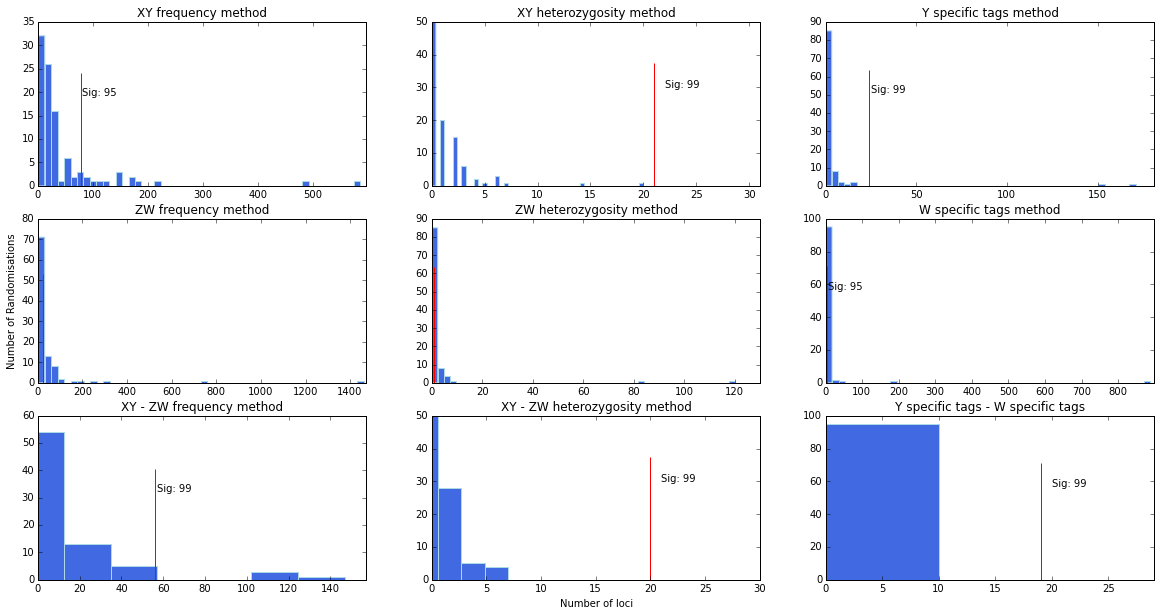

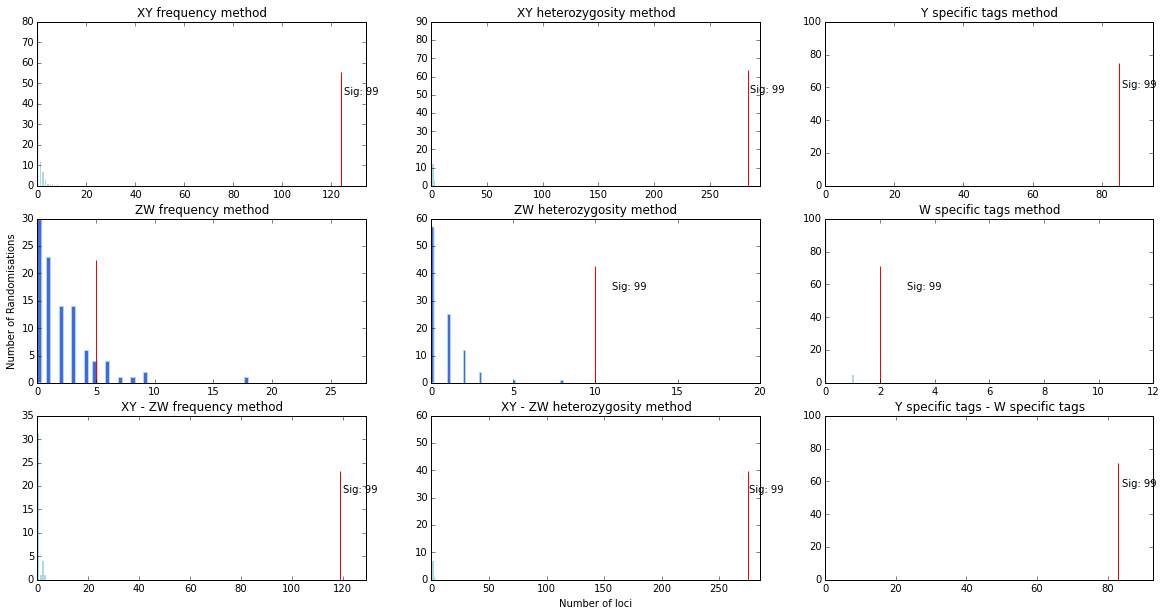

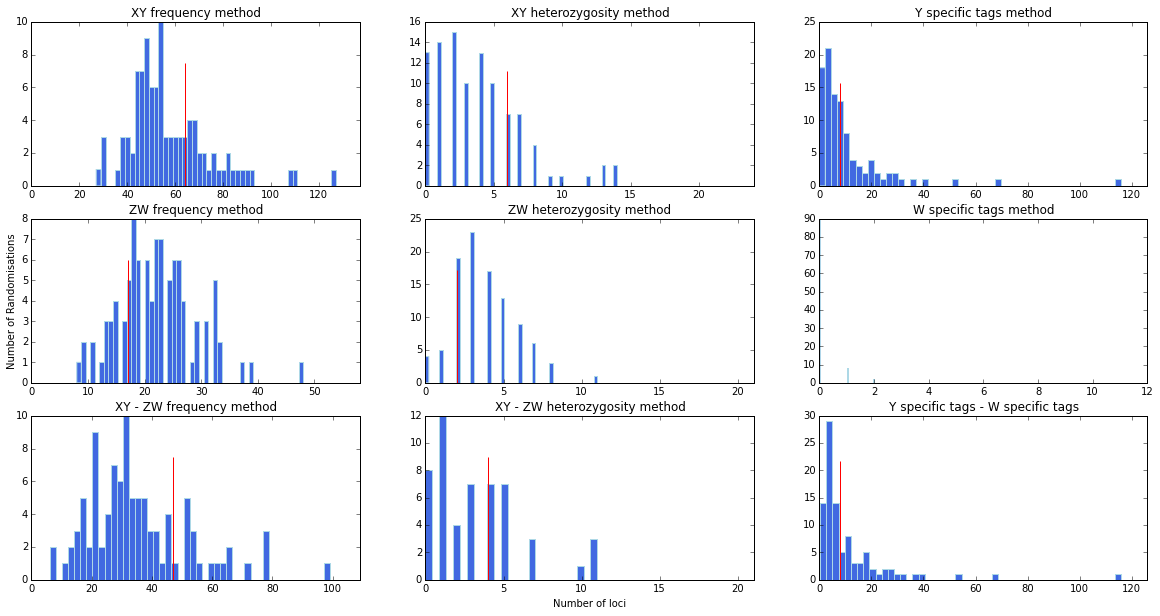

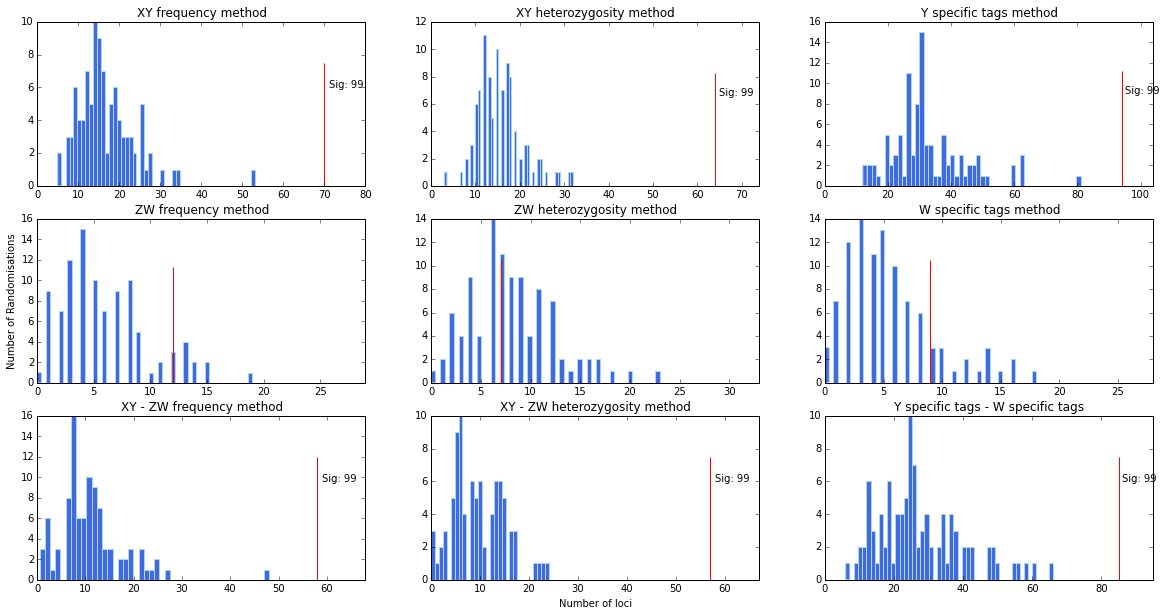

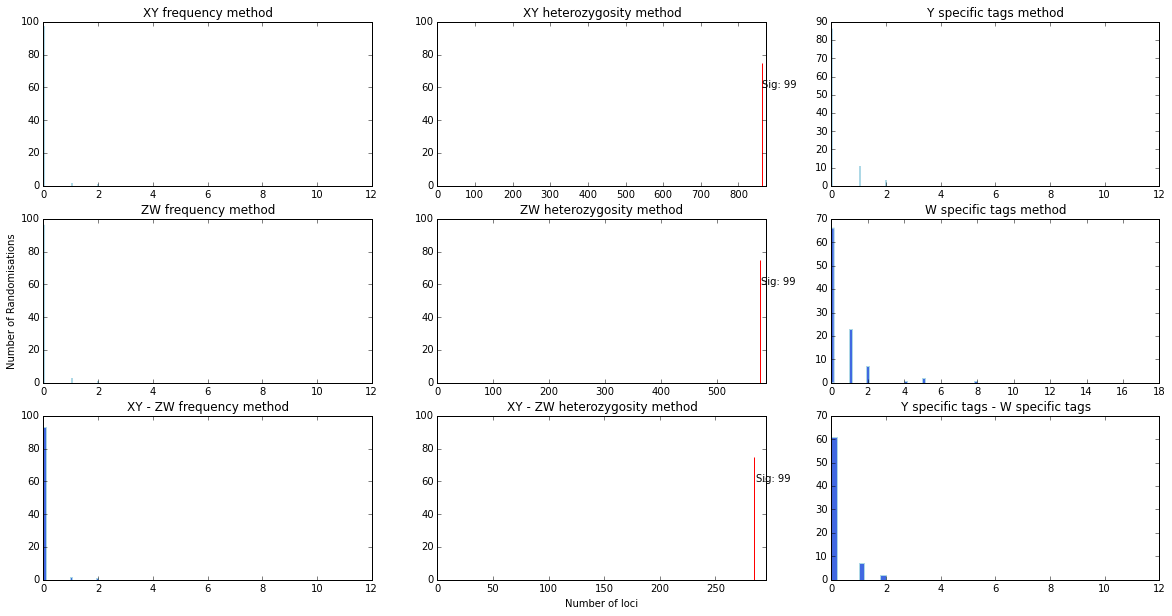

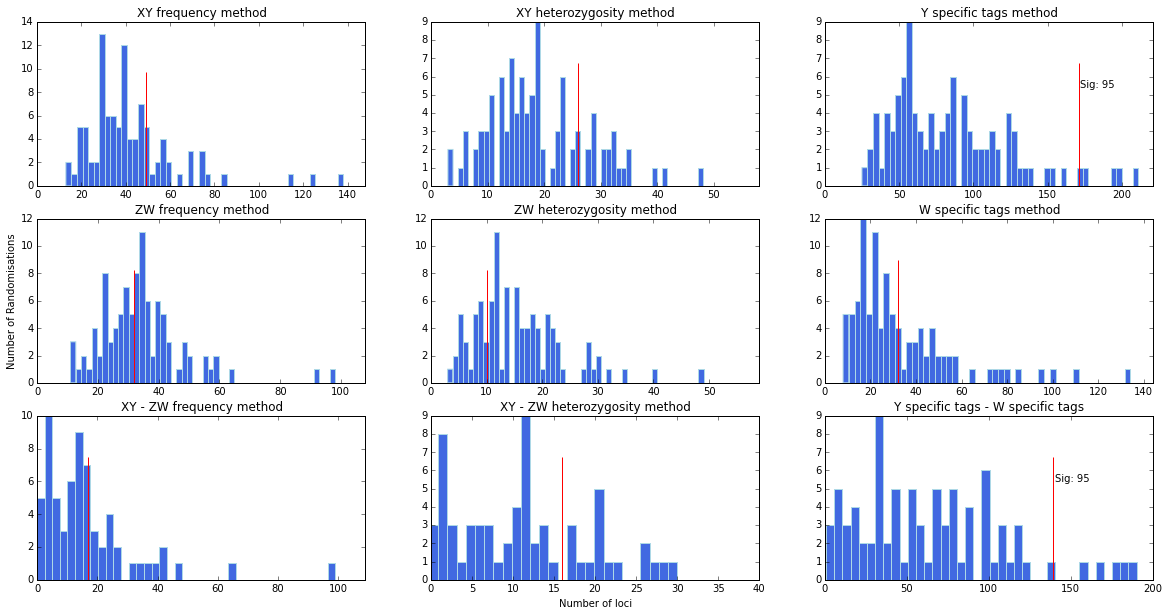

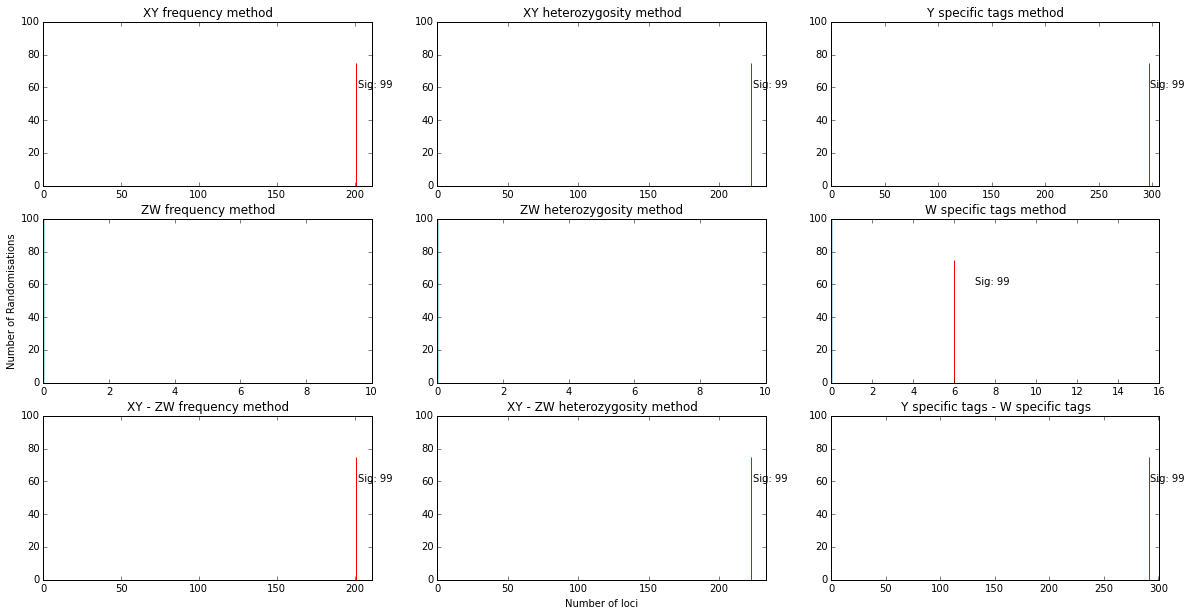

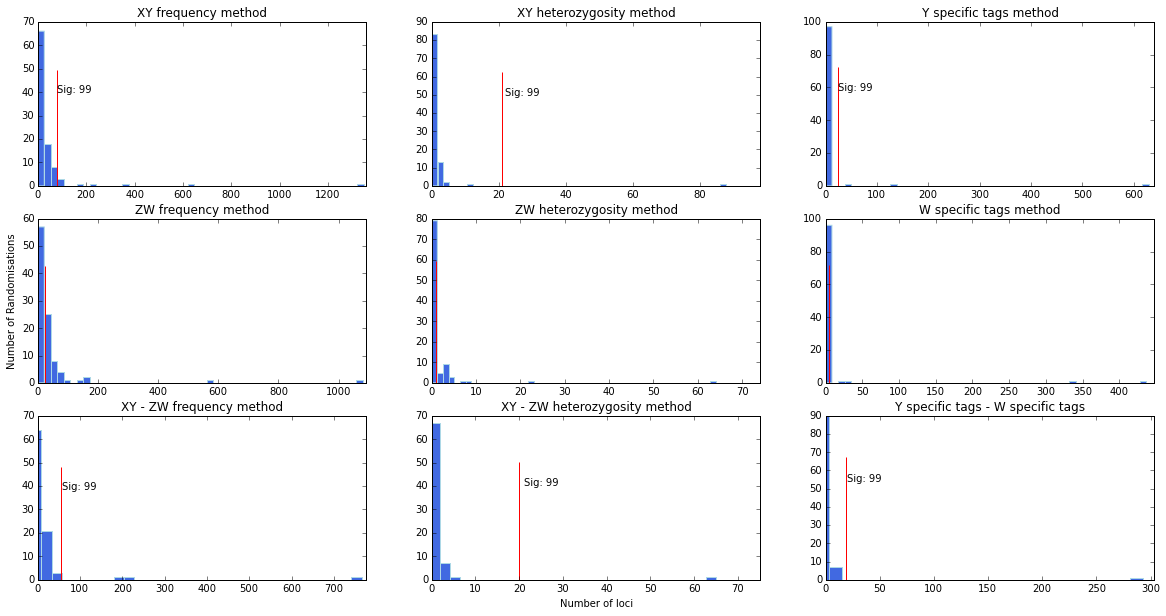

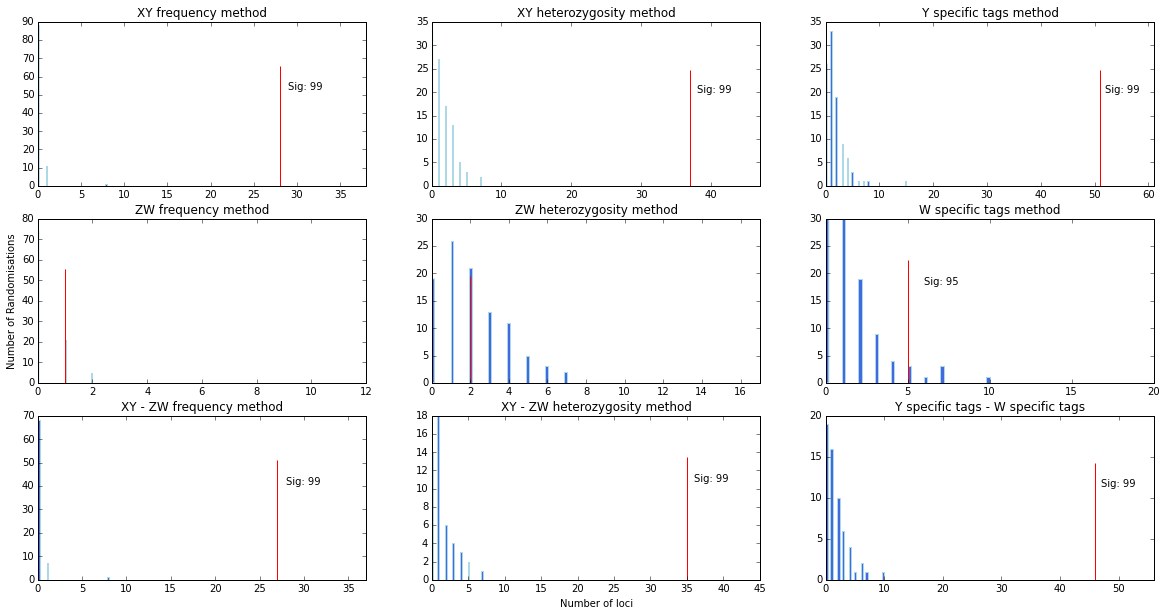

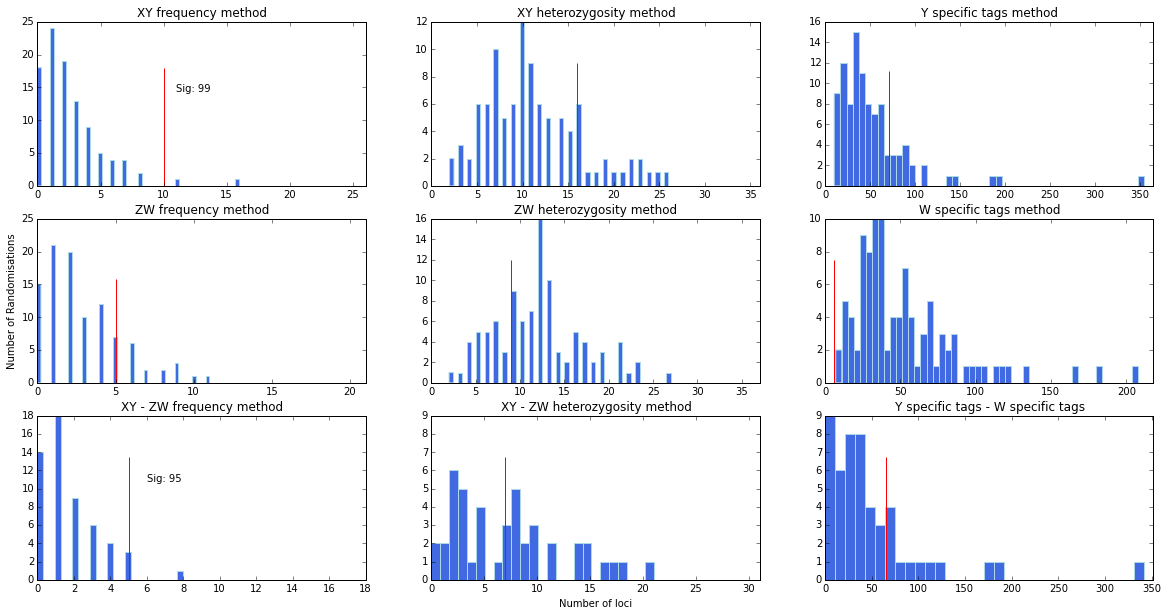

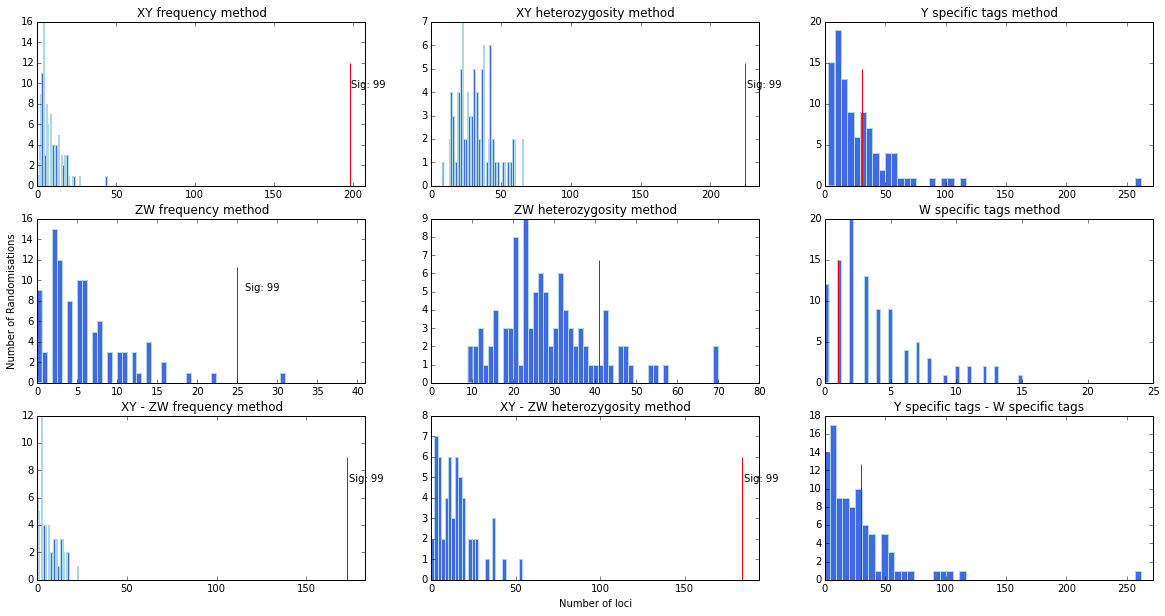

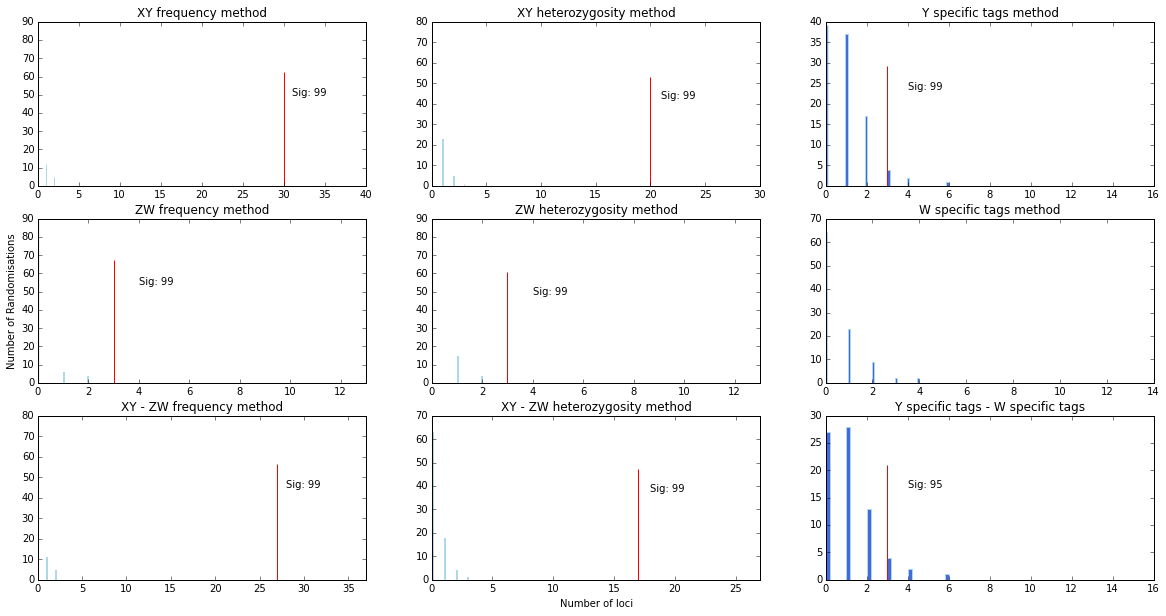

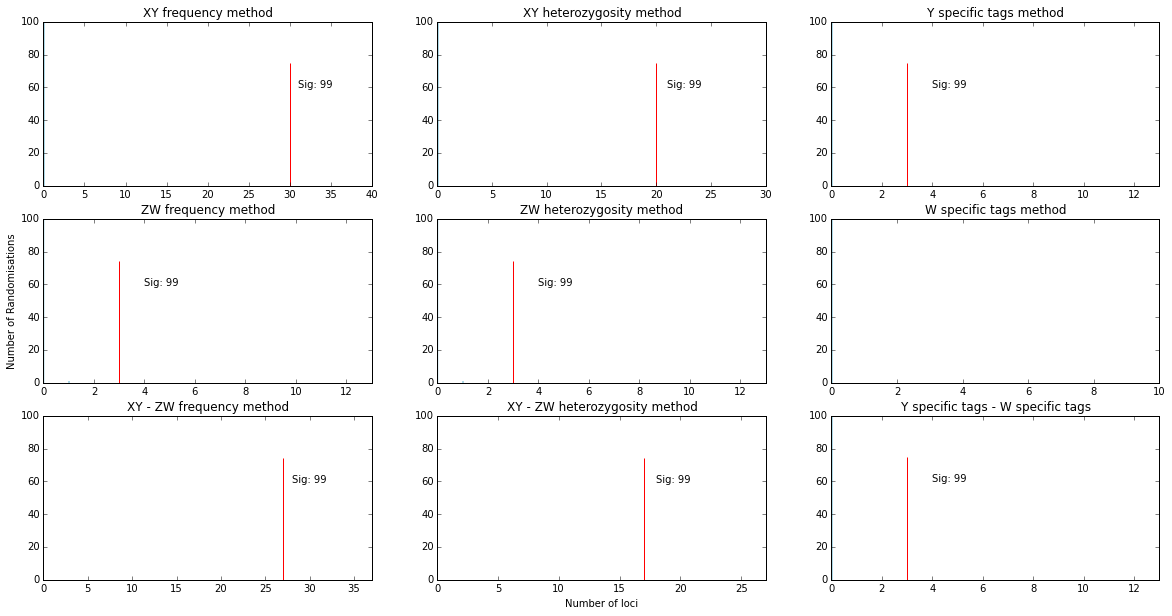

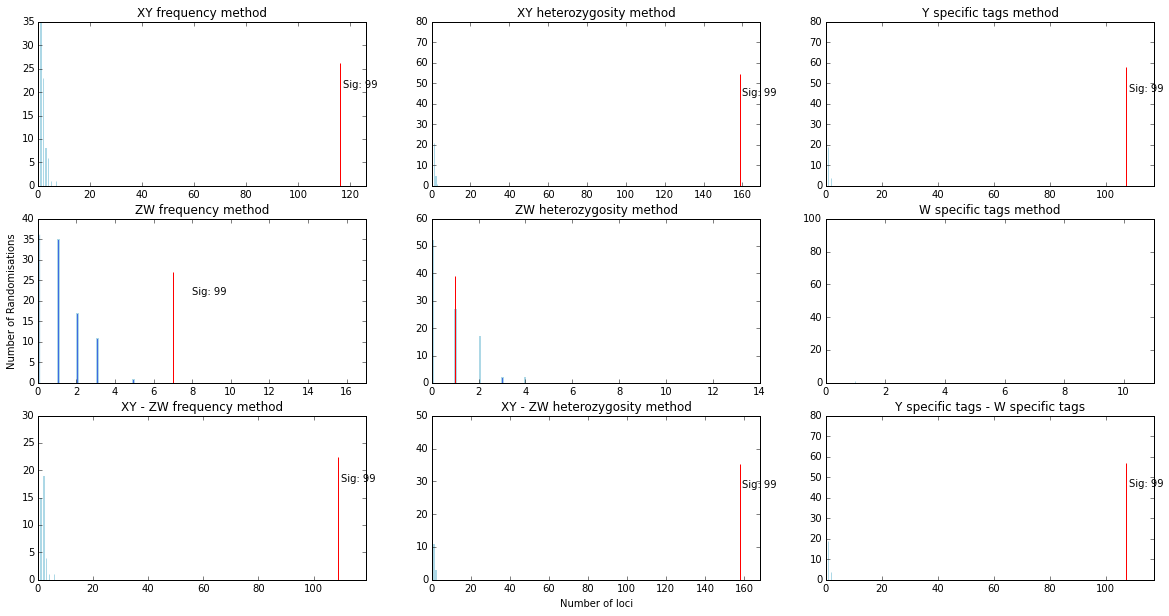

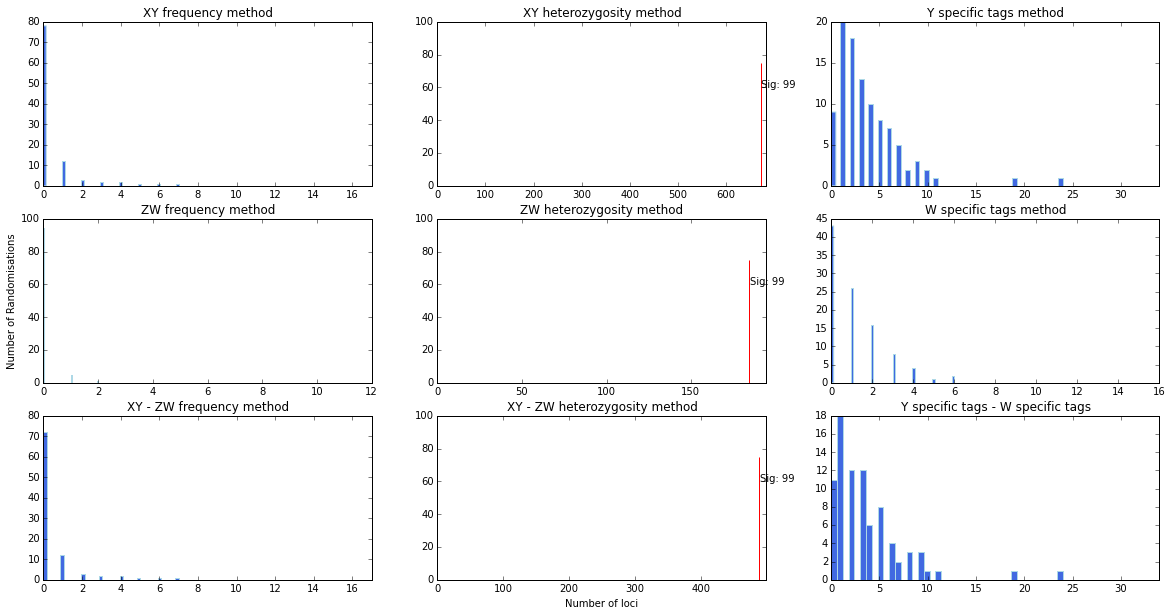

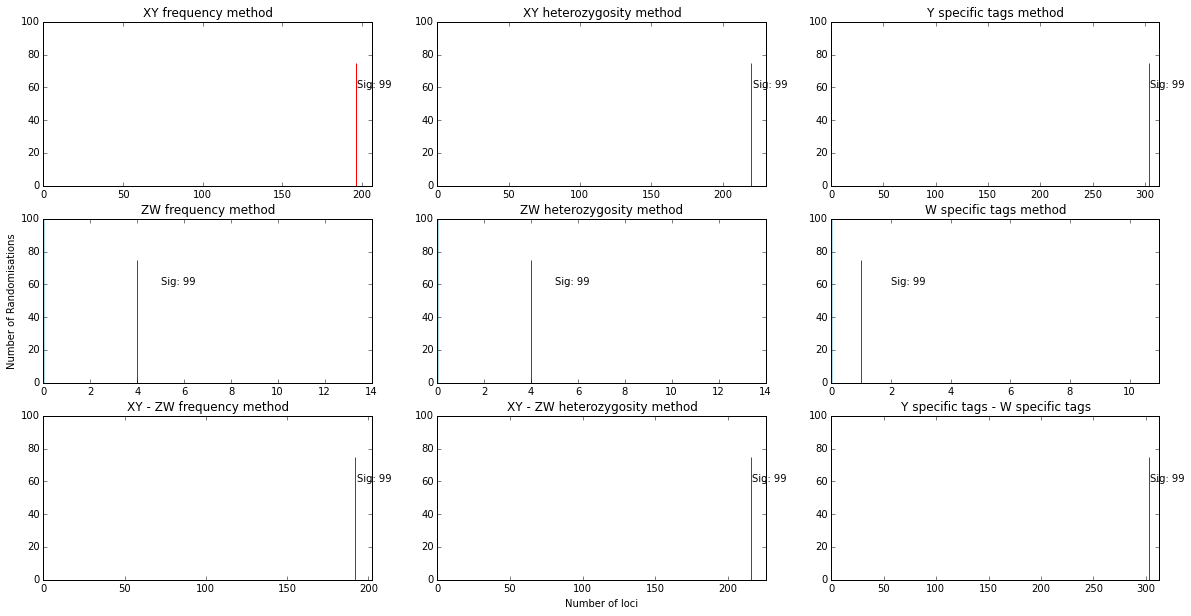

In [226]:
myrealdatapath = "/home/djeffrie/Data/RADseq/Randomisations/Real_data.txt"
myrandomisation_directory = "/home/djeffrie/Data/RADseq/Randomisations/"

randomisation_plotter(myrandomisation_directory, myrealdatapath, plot=True, Outs_constant=2)

### Im not satisfied with how these are plotted, I want them all on one figure. So I will try the violin plot again. 

In [1]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Randomisations/"):
    for fil in files:
        if fil.startswith("Randomisations") and "pdf" not in fil:
            rando_paths.append("%s/%s" % (root, fil))
print rando_paths

['/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rkuk.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rchen.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rlat.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Pper.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Lmonte_fam_2alt.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rmac.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rorn_o.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Ltarah.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Ribe_Ast.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rjap_h.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rdal.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Rjap_t.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Lchiri.txt', '/home/djeffrie/Data/RADseq/Randomisations//Randomisations_Ribe

In [3]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))

    



In [4]:
whisky_data.keys()

['Lchiri',
 'Lyav',
 'Psah',
 'Lmonte_fam_2alt',
 'Pper',
 'Rorn_o',
 'Rorn_h',
 'Lpip_east',
 'Rdal',
 'Rmac',
 'Rkuk_muyu',
 'Ribe_Port',
 'Rlat',
 'Rita_fam',
 'Ribe_Ast',
 'Rdyb',
 'Rjap_t',
 'Ltarah',
 'Rkuk',
 'Rchen',
 'Lber',
 'Rarv',
 'Rjap_h',
 'Lpip_west',
 'Lmonte_fam_1alt',
 'Ribe_Ast_fam']

In [15]:
real_data = open("/home/djeffrie/Data/RADseq/Randomisations/Real_data_1.txt", 'r').readlines()
for i in real_data:
    print i

#Sp	XY freq SNPs	XY het SNPs	Y linked tags	ZW freq SNPs	ZW het SNPs	W linked tags

Lber	10	16	71	5	9	6

Lchiri	33	18	2	2	0	1

Lmonte_fam_1alt	954	570	912	684	159	642

Lmonte_fam_2alt	942	729	983	692	489	628

Lpip_east	108	22	25	19	21	1

Lpip_west	20	28	14	7	5	2

Ltarah	28	36	51	1	2	5

Lyav	49	26	171	32	10	32

Pper	61	57	94	12	7	9

Psah	32	14	26	32	25	1

Rarv	109	149	94	7	1	0

Rchen	55	13	8	17	2	0

Rdal	171	184	31	25	41	1

Rdyb	101	98	7	69	56	7

Ribe_Ast	168	184	304	4	4	1

Ribe_Ast_fam	172	186	297	0	0	6

Ribe_Port	85	132	474	45	85	132

Rita_fam	525	540	517	114	121	97

Rjap_t	494	710	57	697	105	20

Rjap_h	522	64	8	178	14	0

Rkuk	112	245	85	5	10	2

Rkuk_muyu	282	141	534	224	316	24

Rlat	23	24	52	0	0	8

Rmac	14	11	342	16	1	2

Rorn_h	830	140	0	585	364	0

Rorn_o	452	68	0	497	203	0



In [16]:
real_data = open("/home/djeffrie/Data/RADseq/Randomisations/Real_data_1.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


Lber
Lchiri
Lmonte_fam_1alt
Lmonte_fam_2alt
Lpip_east
Lpip_west
Ltarah
Lyav
Pper
Psah
Rarv
Rchen
Rdal
Rdyb
Ribe_Ast
Ribe_Ast_fam
Ribe_Port
Rita_fam
Rjap_h
Rjap_t
Rkuk
Rkuk_muyu
Rlat
Rmac
Rorn_h
Rorn_o


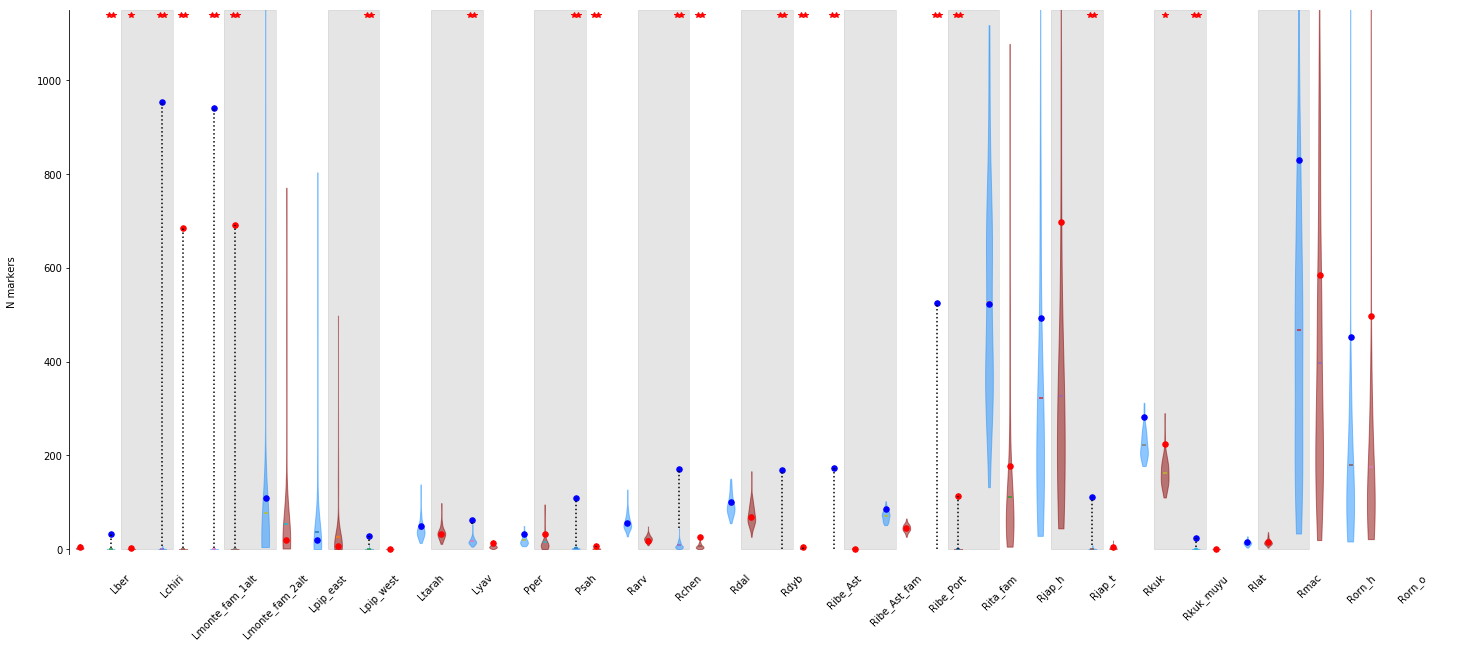

In [18]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,10), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 0
col = "white"

max_y = 1150


real_data = open("/home/djeffrie/Data/RADseq/Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_freq"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_freq"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        if sum(whisky_data[i]["ZW_freq"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_freq"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)

        
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_freq"]), (whisky_data[i]["ZW_freq"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_freq"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_freq"], c = "red", zorder = 2, s = 30)
        
        if real_data_dict[i]["XY_freq"][0] > max(whisky_data[i]["XY_freq"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_freq"]), real_data_dict[i]["XY_freq"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_freq"][0] > max(whisky_data[i]["ZW_freq"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_freq"]), real_data_dict[i]["ZW_freq"],  zorder = 2, linestyles='dotted')

                        
        if real_data_dict[i]["XY_freq"][0] > np.percentile(whisky_data[i]["XY_freq"], 99):
            ax.plot(pos-0.24, 1140, "*r", zorder = 3)
            ax.plot(pos-0.16, 1140, "*r", zorder = 3)
        elif real_data_dict[i]["XY_freq"][0] > np.percentile(whisky_data[i]["XY_freq"], 95):
            ax.plot(pos-0.2, 1140, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_freq"][0] > np.percentile(whisky_data[i]["ZW_freq"], 99):
            ax.plot(pos+0.24, 1140, "*r", zorder = 3)
            ax.plot(pos+0.16, 1140, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_freq"][0] > np.percentile(whisky_data[i]["ZW_freq"], 95):
            ax.plot(pos+0.2, 1140, "*r", zorder = 3)
    
        
        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 1150)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Randomisations/SLM_Randomisations_freq.svg")
    
plt.show()

Lber
Lchiri
Lmonte_fam_1alt
Lmonte_fam_2alt
Lpip_east
Lpip_west
Ltarah
Lyav
Pper
Psah
Rarv
Rchen
Rdal
Rdyb
Ribe_Ast
Ribe_Ast_fam
Ribe_Port
Rita_fam
Rjap_h
Rjap_t
Rkuk
Rkuk_muyu
Rlat
Rmac
Rorn_h
Rorn_o


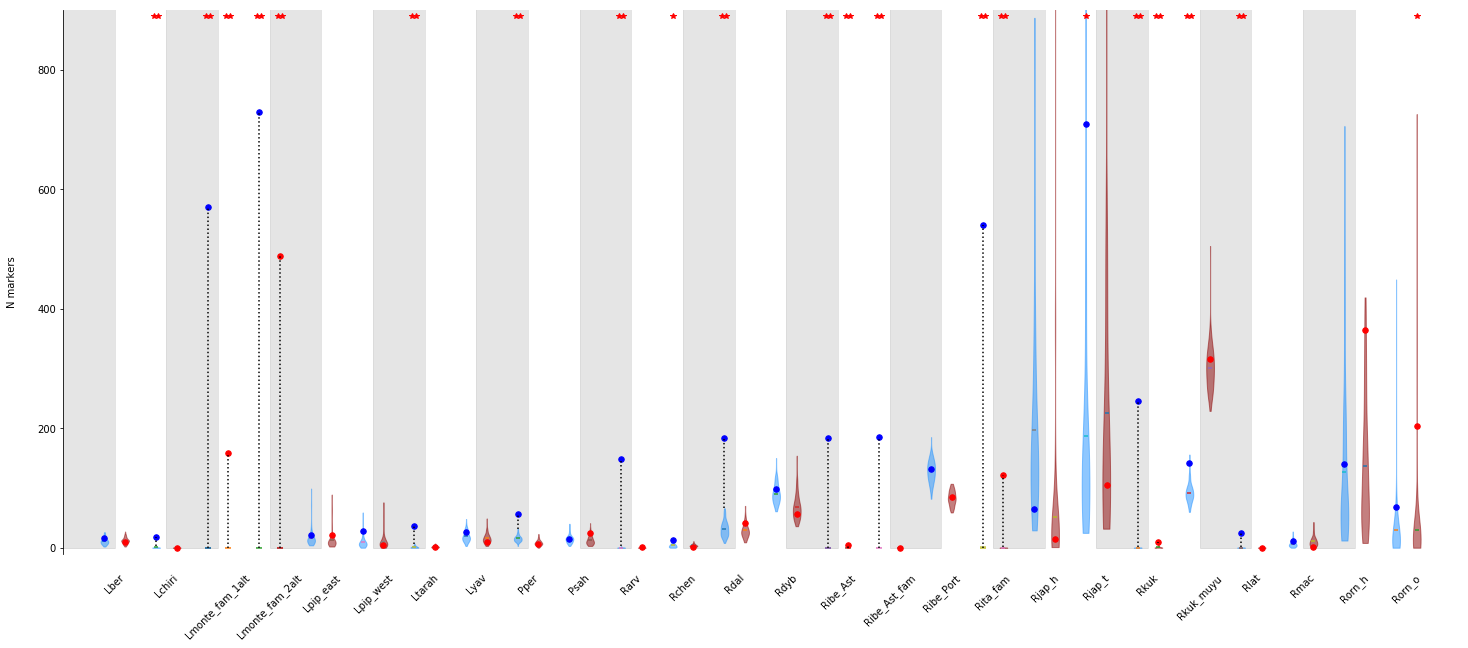

In [13]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,10), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 1000


real_data = open("/home/djeffrie/Data/RADseq/Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, 890, "*r", zorder = 3)
            ax.plot(pos-0.16, 890, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, 890, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, 890, "*r", zorder = 3)
            ax.plot(pos+0.16, 890, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, 890, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 900)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Randomisations/SLM_Randomisations_het.svg")
    
plt.show()

Lber
Lchiri
Lmonte_fam_1alt
Lmonte_fam_2alt
Lpip_east
Lpip_west
Ltarah
Lyav
Pper
Psah
Rarv
Rchen
Rdal
Rdyb
Ribe_Ast
Ribe_Ast_fam
Ribe_Port
Rita_fam
Rjap_h
Rjap_t
Rkuk
Rkuk_muyu
Rlat
Rmac
Rorn_h
Rorn_o


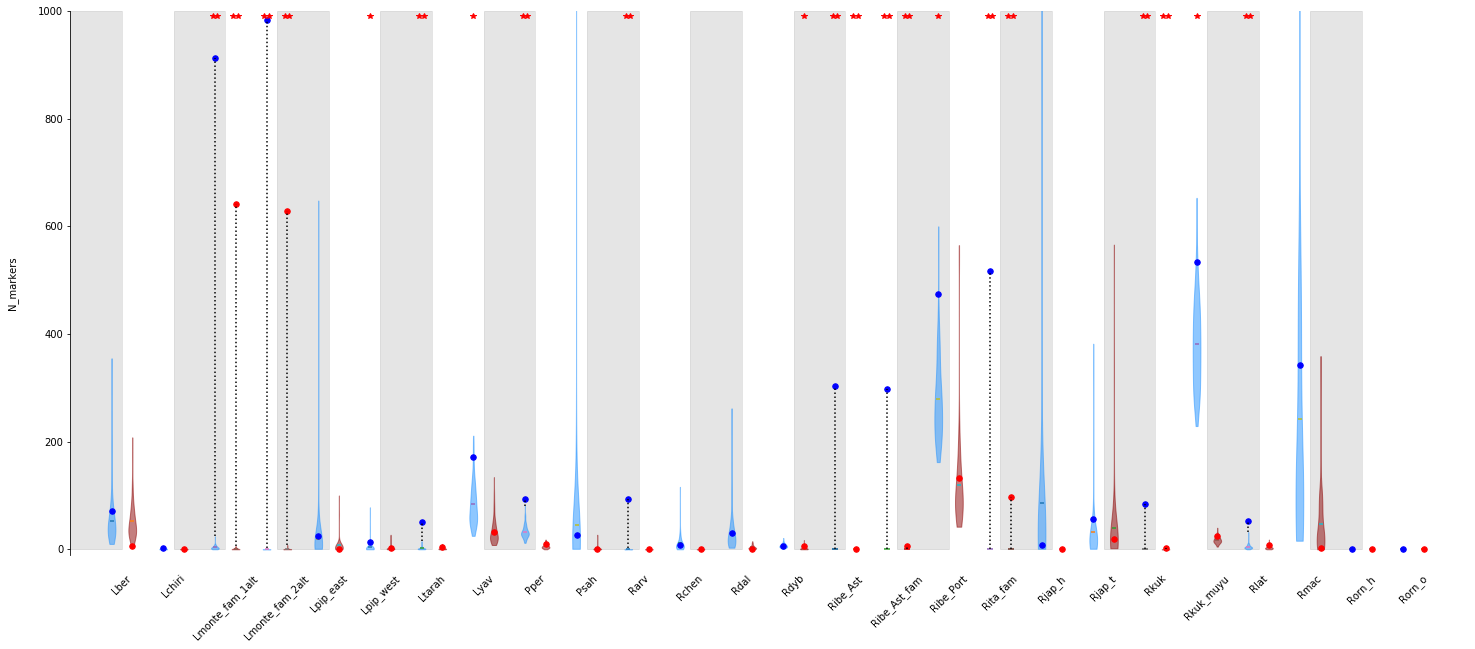

In [14]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,10), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 1000


real_data = open("/home/djeffrie/Data/RADseq/Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["Y_spec"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["Y_spec"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["Y_spec"]), (whisky_data[i]["Y_spec"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_spec"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_spec"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_spec"]), (whisky_data[i]["ZW_spec"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["Y_spec"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_spec"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["Y_spec"][0] > max(whisky_data[i]["Y_spec"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["Y_spec"]), real_data_dict[i]["Y_spec"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_spec"][0] > max(whisky_data[i]["ZW_spec"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_spec"]), real_data_dict[i]["ZW_spec"],  zorder = 2, linestyles='dotted')

        
        if real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 99):
            ax.plot(pos-0.24, 990, "*r", zorder = 3)
            ax.plot(pos-0.16, 990, "*r", zorder = 3)
        elif real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 95):
            ax.plot(pos-0.2, 990, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 99):
            ax.plot(pos+0.24, 990, "*r", zorder = 3)
            ax.plot(pos+0.16, 990, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 95):
            ax.plot(pos+0.2, 990, "*r", zorder = 3)
    
        
        
        
        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 1000)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N_markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')


plt.savefig("/home/djeffrie/Data/RADseq/Randomisations/SLM_Randomisations_YW_spec.svg")
    
plt.show()

## Rarvalis subsampling tests

Test 1. One haplotype only  
Test 2. Two haplotypes  
Test 3. Female skewed  
Test 4. Male skewed  

### Test 1.

In [204]:
Parameter_dictionaries = []

In [161]:
Parameter_dict_Rarv_sub1 = {}
Parameter_dict_Rarv_sub1["Name"] = "Rarv_sub1"

##### Data ########################

Parameter_dict_Rarv_sub1['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_sub1['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_oneHap/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_sub1['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_Subsample_oneHap/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_sub1['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_sub1['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub1['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub1['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_sub1['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_sub1['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_sub1['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_sub1['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub1['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub1['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_sub1['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_sub1)

### Test 2.

In [162]:
Parameter_dict_Rarv_sub2 = {}
Parameter_dict_Rarv_sub2["Name"] = "Rarv_sub2"


##### Data ########################

Parameter_dict_Rarv_sub2['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_sub2['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_twoHaps/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_sub2['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_Subsample_twoHaps/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_sub2['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_sub2['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub2['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub2['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_sub2['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_sub2['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_sub2['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_sub2['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub2['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub2['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_sub2['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_sub2)


In [205]:
Parameter_dictionaries = []

### Test 3.

In [192]:
Parameter_dict_Rarv_sub3 = {}
Parameter_dict_Rarv_sub3["Name"] = "Rarv_sub3"


##### Data ########################

Parameter_dict_Rarv_sub3['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_sub3['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Female/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_sub3['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_Subsample_skewed_Female/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_sub3['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_sub3['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub3['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub3['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_sub3['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_sub3['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_sub3['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_sub3['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub3['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub3['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_sub3['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_sub3)


###Test 4.

In [206]:
Parameter_dict_Rarv_sub4 = {}
Parameter_dict_Rarv_sub4["Name"] = "Rarv_sub4"


##### Data ########################

Parameter_dict_Rarv_sub4['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_sub4['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Male/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_sub4['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Subsample_skewed_Male/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_sub4['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_sub4['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub4['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub4['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_sub4['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_sub4['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_sub4['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_sub4['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_sub4['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_sub4['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_sub4['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_sub4)

### Plotting

In [209]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations//"):
    for fil in files:
        if fil.startswith("Randomisations") and "pdf" not in fil:
            rando_paths.append("%s/%s" % (root, fil))
print rando_paths

['/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations///Randomisations_Rarv_sub3.txt', '/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations///Randomisations_Rarv_sub2.txt', '/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations///Randomisations_Rarv_sub1.txt', '/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations///Randomisations_Rarv_sub4.txt']


In [210]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))


In [211]:
real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()
for i in real_data:
    print i

#Sp	XY freq SNPs	XY het SNPs	Y linked tags	ZW freq SNPs	ZW het SNPs	W linked tags

Rarv_sub1	135	160	201	37	16	50

Rarv_sub2	168	86	332	114	125	140

Rarv_sub3	88	117	116	27	15	99

Rarv_sub4	140	182	262	15	11	13



In [212]:
real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


Rarv_sub1
Rarv_sub2
Rarv_sub3
Rarv_sub4


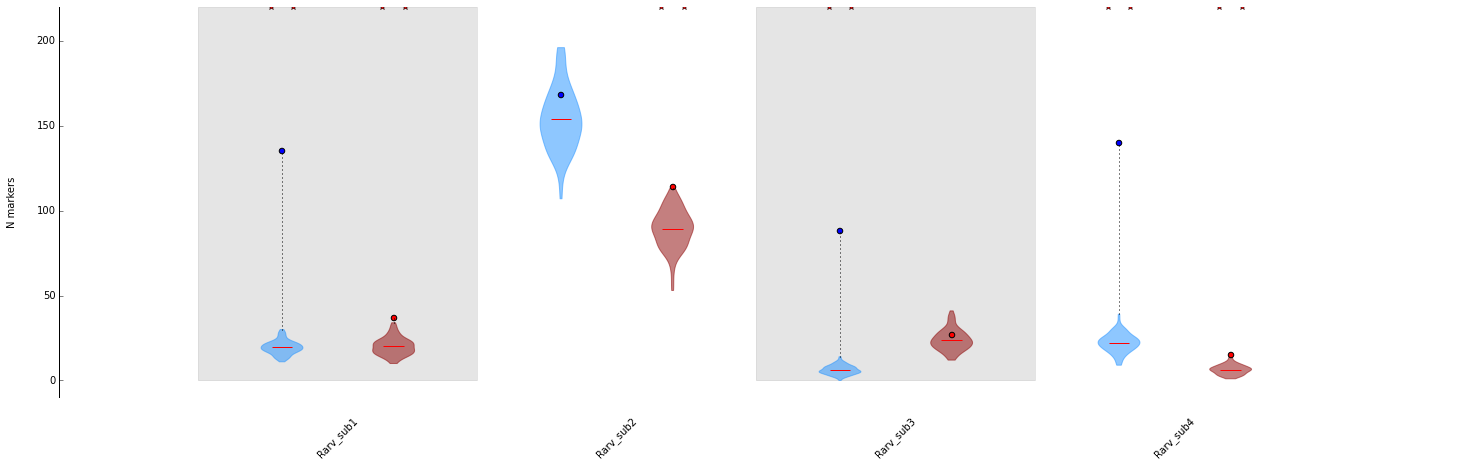

In [220]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 220


real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_freq"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_freq"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        if sum(whisky_data[i]["ZW_freq"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_freq"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)

        
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_freq"]), (whisky_data[i]["ZW_freq"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_freq"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_freq"], c = "red", zorder = 2, s = 30)
        
        if real_data_dict[i]["XY_freq"][0] > max(whisky_data[i]["XY_freq"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_freq"]), real_data_dict[i]["XY_freq"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_freq"][0] > max(whisky_data[i]["ZW_freq"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_freq"]), real_data_dict[i]["ZW_freq"],  zorder = 2, linestyles='dotted')

                        
        if real_data_dict[i]["XY_freq"][0] > np.percentile(whisky_data[i]["XY_freq"], 99):
            ax.plot(pos-0.24, 220, "*r", zorder = 3)
            ax.plot(pos-0.16, 220, "*r", zorder = 3)
        elif real_data_dict[i]["XY_freq"][0] > np.percentile(whisky_data[i]["XY_freq"], 95):
            ax.plot(pos-0.2, 1140, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_freq"][0] > np.percentile(whisky_data[i]["ZW_freq"], 99):
            ax.plot(pos+0.24, 220, "*r", zorder = 3)
            ax.plot(pos+0.16, 220, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_freq"][0] > np.percentile(whisky_data[i]["ZW_freq"], 95):
            ax.plot(pos+0.2, 1140, "*r", zorder = 3)
    
        
        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 220)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/SLM_Randomisations_freq.svg")
    
plt.show()

Rarv_sub1
Rarv_sub2
Rarv_sub3
Rarv_sub4


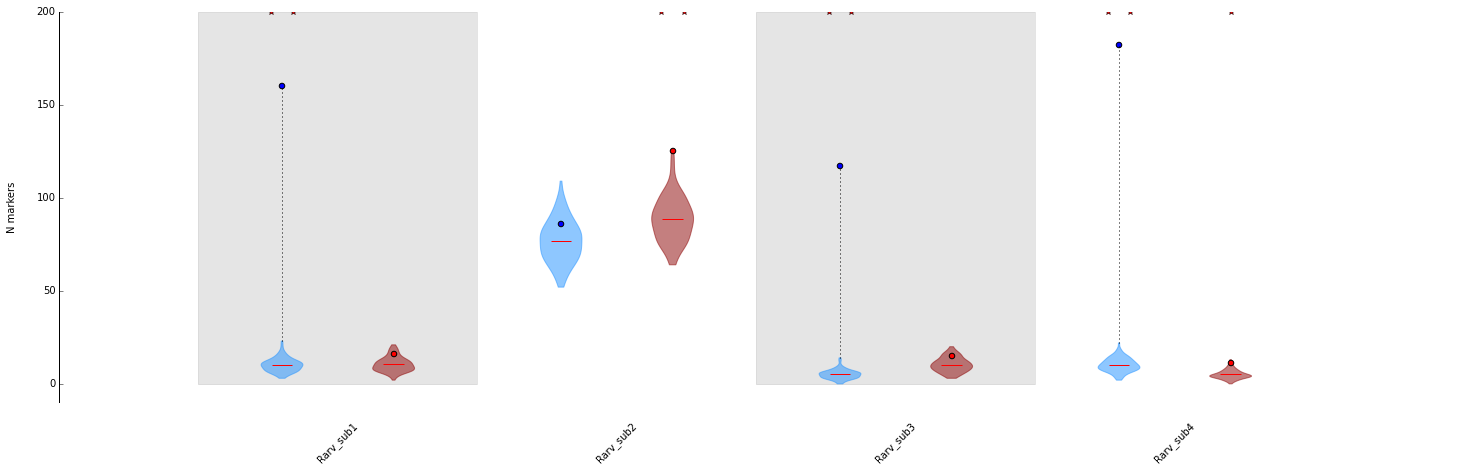

In [217]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 200


real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, 200, "*r", zorder = 3)
            ax.plot(pos-0.16, 200, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, 200, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, 200, "*r", zorder = 3)
            ax.plot(pos+0.16, 200, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, 200, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 200)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/SLM_Randomisations_het.svg")
    
plt.show()

Rarv_sub1
Rarv_sub2
Rarv_sub3
Rarv_sub4


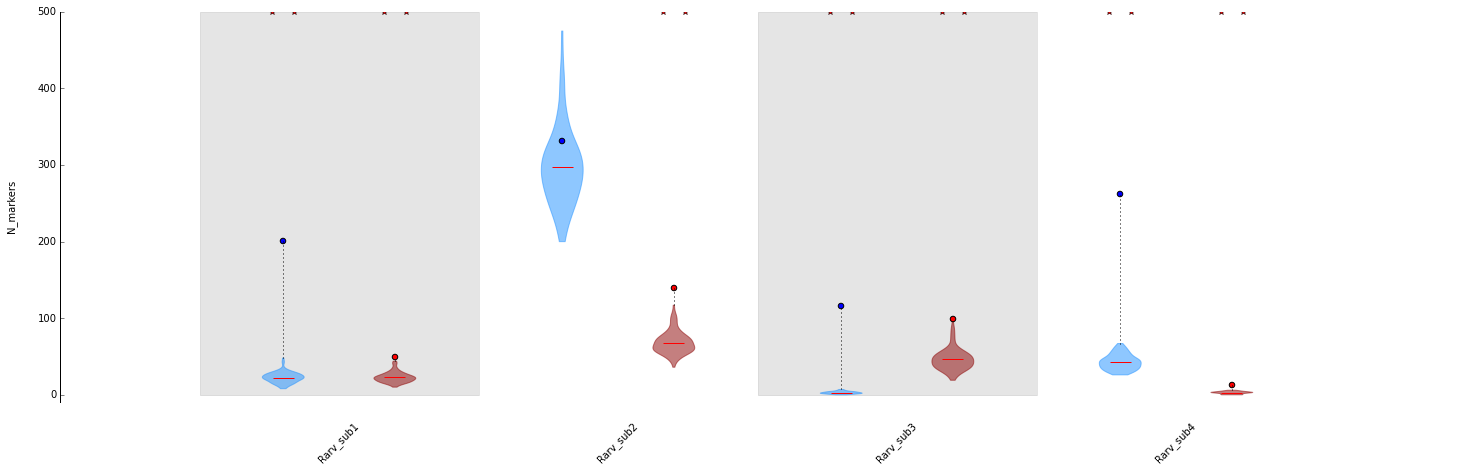

In [218]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 500


real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["Y_spec"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["Y_spec"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["Y_spec"]), (whisky_data[i]["Y_spec"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_spec"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_spec"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_spec"]), (whisky_data[i]["ZW_spec"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["Y_spec"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_spec"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["Y_spec"][0] > max(whisky_data[i]["Y_spec"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["Y_spec"]), real_data_dict[i]["Y_spec"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_spec"][0] > max(whisky_data[i]["ZW_spec"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_spec"]), real_data_dict[i]["ZW_spec"],  zorder = 2, linestyles='dotted')

        
        if real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 99):
            ax.plot(pos-0.24, 500, "*r", zorder = 3)
            ax.plot(pos-0.16, 500, "*r", zorder = 3)
        elif real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 95):
            ax.plot(pos-0.2, 500, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 99):
            ax.plot(pos+0.24, 500, "*r", zorder = 3)
            ax.plot(pos+0.16, 500, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 95):
            ax.plot(pos+0.2, 500, "*r", zorder = 3)
    
        
        
        
        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 500)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N_markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')


plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/SLM_Randomisations_YW_spec.svg")
    
plt.show()

Rarv_sub1
Rarv_sub2
Rarv_sub3
Rarv_sub4


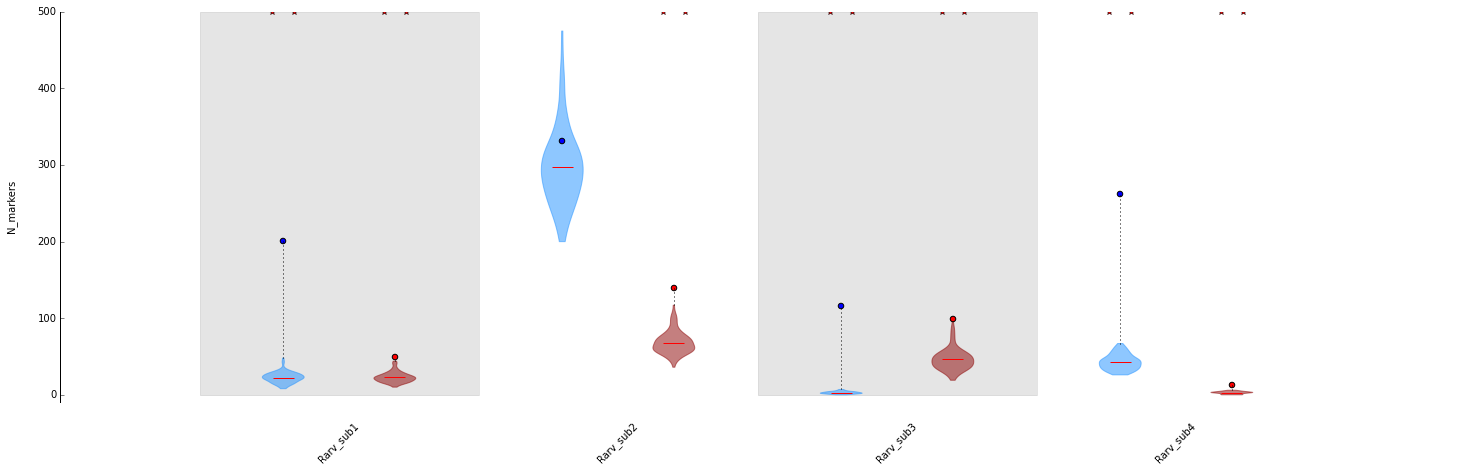

In [219]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 500


real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-0.5, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["Y_spec"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["Y_spec"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["Y_spec"]), (whisky_data[i]["Y_spec"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_spec"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_spec"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_spec"]), (whisky_data[i]["ZW_spec"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["Y_spec"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_spec"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["Y_spec"][0] > max(whisky_data[i]["Y_spec"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["Y_spec"]), real_data_dict[i]["Y_spec"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_spec"][0] > max(whisky_data[i]["ZW_spec"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_spec"]), real_data_dict[i]["ZW_spec"],  zorder = 2, linestyles='dotted')

        
        if real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 99):
            ax.plot(pos-0.24, 500, "*r", zorder = 3)
            ax.plot(pos-0.16, 500, "*r", zorder = 3)
        elif real_data_dict[i]["Y_spec"][0] > np.percentile(whisky_data[i]["Y_spec"], 95):
            ax.plot(pos-0.2, 500, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 99):
            ax.plot(pos+0.24, 500, "*r", zorder = 3)
            ax.plot(pos+0.16, 500, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_spec"][0] > np.percentile(whisky_data[i]["ZW_spec"], 95):
            ax.plot(pos+0.2, 500, "*r", zorder = 3)
    
        
        
        
        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, 500)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N_markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')


plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/SLM_Randomisations_YW_spec.svg")
    
plt.show()

## I will now do the permutation tests for the downsampling analyses of R. arvalis. 

In [32]:
Parameter_dictionaries = []

In [5]:
Parameter_dict_Rarv_down_1 = {}
Parameter_dict_Rarv_down_1["Name"] = "Rarv_down_1"


##### Data ########################

Parameter_dict_Rarv_down_1['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_1['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_1['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_19_19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_1['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_1['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_1['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_1['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_1['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_1['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_1['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_1['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_1['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_1['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_1['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_1)

In [6]:
Parameter_dict_Rarv_down_2 = {}
Parameter_dict_Rarv_down_2["Name"] = "Rarv_down_2"


##### Data ########################

Parameter_dict_Rarv_down_2['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_2['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_2['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_17_17/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_2['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_2['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_2['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_2['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_2['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_2['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_2['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_2['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_2['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_2['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_2['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_2)

In [7]:
Parameter_dict_Rarv_down_3 = {}
Parameter_dict_Rarv_down_3["Name"] = "Rarv_down_3"


##### Data ########################

Parameter_dict_Rarv_down_3['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_3['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_3['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_15_15/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_3['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_3['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_3['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_3['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_3['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_3['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_3['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_3['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_3['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_3['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_3['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_3)

In [8]:
Parameter_dict_Rarv_down_4 = {}
Parameter_dict_Rarv_down_4["Name"] = "Rarv_down_4"


##### Data ########################

Parameter_dict_Rarv_down_4['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_4['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_4['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_13_13/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_4['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_4['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_4['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_4['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_4['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_4['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_4['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_4['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_4['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_4['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_4['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_4)

In [9]:
Parameter_dict_Rarv_down_5 = {}
Parameter_dict_Rarv_down_5["Name"] = "Rarv_down_5"


##### Data ########################

Parameter_dict_Rarv_down_5['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_5['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_5['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_11_11/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_5['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_5['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_5['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_5['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_5['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_5['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_5['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_5['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_5['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_5['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_5['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_5)

In [10]:
Parameter_dict_Rarv_down_6 = {}
Parameter_dict_Rarv_down_6["Name"] = "Rarv_down_6"


##### Data ########################

Parameter_dict_Rarv_down_6['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_6['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_6['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_9_9/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_6['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_6['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_6['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_6['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_6['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_6['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_6['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_6['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_6['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_6['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_6['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_6)

In [11]:
Parameter_dict_Rarv_down_7 = {}
Parameter_dict_Rarv_down_7["Name"] = "Rarv_down_7"


##### Data ########################

Parameter_dict_Rarv_down_7['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_7['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_7['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_7_7/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_7['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_7['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_7['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_7['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_7['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_7['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_7['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_7['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_7['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_7['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_7['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_7)

In [4]:
Parameter_dict_Rarv_down_8 = {}
Parameter_dict_Rarv_down_8["Name"] = "Rarv_down_8"


##### Data ########################

Parameter_dict_Rarv_down_8['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_Rarv_down_8['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_Rarv_down_8['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_5_5/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_Rarv_down_8['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_Rarv_down_8['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_8['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_8['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_Rarv_down_8['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_Rarv_down_8['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_Rarv_down_8['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_Rarv_down_8['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_Rarv_down_8['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_Rarv_down_8['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_Rarv_down_8['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_Rarv_down_8)

In [3]:
Parameter_dictionaries = []

In [5]:
Parameter_dictionaries

[{'Catalog': '/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/batch_1.catalog.tags.tsv.gz',
  'Name': 'Rarv_down_8',
  'Pop_map': '/home/djeffrie/Data/RADseq/Rarvalis_NEW//Stacks/Populations_downsample_5_5/Sex_ID_info.txt',
  'VCF': '/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf',
  'X_or_Z_freq_threshold': 0.4,
  'coverage_threshold1': 3,
  'coverage_threshold2': 3,
  'heterogamtic_heterozygosity_threshold': 0.6,
  'homogametic_REF_allele_freq': 1,
  'homogamtic_homozygosity_threshold': 1,
  'maf_threshold1': 0.05,
  'maf_threshold2': 0.05,
  'sample_presence_cutoff1': 0.1,
  'sample_presence_cutoff2': 0.1,
  'sex_presence_threshold': 0.5}]

## Run the permutations

In [24]:
## Define a program to help parallelise the analyses


def Super_SLM_finder_parallel(popmap, Parameter_dict):
    import os
    
    Parameter_dict['Pop_map'] = popmap
    Parameter_dict['VCF'] = "%s.vcf" % popmap.rpartition(".")[0]
    results_dict = {}
    results_dict["XYset"], results_dict["ZWset"], results_dict["Detailed"] = SLMF_L.Super_SLM_finder(Parameter_dict, "111", verbose = False, write_files=False, plot=False)
    
    os.remove(Parameter_dict['VCF']) ## remove VCFs as they are used
    os.remove("%s.altered" % Parameter_dict['VCF'])
    os.remove("%s.all_frequencies.tsv" % Parameter_dict['VCF'])
    

    return results_dict
    
    

In [8]:
from joblib import Parallel, delayed
import multiprocessing
import os
import shutil
from random import shuffle

results_dict = {}

for dataset in Parameter_dictionaries:
    print "processing dataset in", dataset["VCF"]
    # 1. Make a new directory next in the VCF path. 
    Randomisation_dir = "%s/Randomisations" % dataset["VCF"].rpartition("/")[0]
    if not os.path.exists(Randomisation_dir):
        os.makedirs(Randomisation_dir)
    
    # 2. Copy sex info and VCF into that folder
    
    shutil.copyfile(dataset["Pop_map"], "%s/Sex_ID_info.txt" % Randomisation_dir)  ## sex info
    shutil.copyfile(dataset["VCF"], "%s/batch_1.vcf" % Randomisation_dir)  ## sex info
    
    orig_vcf = "%s/batch_1.vcf" % Randomisation_dir
    
    print "\nRandomisations happening in %s" % Randomisation_dir
    
    ## 3. Make the randomised sex info files

    orig_popmap_path = "%s/Sex_ID_info.txt" % Randomisation_dir
    orig_popmap = open(orig_popmap_path, 'r').readlines()

    sexes = []
    samples = []
    IDs = []
    randomisations = []

    for line in orig_popmap:
        sexes.append(line.strip().split()[1])
        samples.append(line.strip().split()[0])
        IDs.append(line.strip().split()[2])

    popmaps = []
    for i in range(100):
        popmap_path = "%s/rand_popmap_%s.txt" % (Randomisation_dir, i)
        popmaps.append(popmap_path)
        rand_popmap = open(popmap_path, 'w')
        shuffle(sexes)
        randomisations.append(sexes)
        
        for i in range(len(samples)):
            rand_popmap.write("%s\t%s\t%s\n" % (samples[i], sexes[i], IDs[i]))

        rand_popmap.close()
    
    print "\nRandom sex info files made"
    
    ## make new VCFs for parallelised analyses
    
    for i in popmaps:
        new_vcf = "%s.vcf" % i.rpartition(".")[0]
        shutil.copyfile(orig_vcf, new_vcf)
        
    ## 4. Run the randomisations
    
    print "\nRunning randomisations\n"
    
    results_dict[dataset["Name"]] = Parallel(n_jobs=4, verbose = 1)(delayed(Super_SLM_finder_parallel)(i, dataset) for i in popmaps)
    
    ## 5. Output the results for each species after the species is complete (i.e. checkpoints)
    
    outfile = open("%s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"]), 'w')
    
    for Randomisation in results_dict[dataset["Name"]]:

        XYfreq = len(Randomisation["Detailed"]["XY"]["freq"])
        XYhet = len(Randomisation["Detailed"]["XY"]["het"])
        Ytags = len(Randomisation["Detailed"]["XY"]["Ytags"])
    
        ZWfreq = len(Randomisation["Detailed"]["ZW"]["freq"])
        ZWhet = len(Randomisation["Detailed"]["ZW"]["het"])
        Wtags = len(Randomisation["Detailed"]["ZW"]["Wtags"])
                
        line = "%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (dataset["Name"],XYfreq,XYhet,Ytags,ZWfreq,ZWhet,Wtags)
    
        outfile.write(line)
        
    outfile.close()
    
    print "Results outputted to %s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"])
    
    
    

processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 1657
Final number of ZW tags = 1852
Final number of XY tags = 1731
Final number of ZW tags = 1809
Final number of XY tags = 1644
Final number of ZW tags = 2279
Final number of XY tags = 1657
Final number of ZW tags = 1792
Final number of XY tags = 1844
Final number of ZW tags = 1683
Final number of XY tags = 1587
Final number of ZW tags = 2061
Final number of XY tags = 1816
Final number of ZW tags = 1647
Final number of XY tags = 2017
Final number of ZW tags = 1706
Final number of XY tags = 1965
Final number of ZW tags = 1703
Final number of XY tags = 1683
Final number of ZW tags = 1876
Final number of XY tags = 1739
Final number of ZW tags = 1766
Final number of XY tags = 1675
Final nu

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 32.2min


Final number of XY tags = 1800
Final number of ZW tags = 1686
Final number of XY tags = 1809
Final number of ZW tags = 1694
Final number of XY tags = 1831
Final number of ZW tags = 1716
Final number of XY tags = 1706
Final number of ZW tags = 2017
Final number of XY tags = 1751
Final number of ZW tags = 1782
Final number of XY tags = 1868
Final number of ZW tags = 1677
Final number of XY tags = 1751
Final number of ZW tags = 1931
Final number of XY tags = 2019
Final number of ZW tags = 1662
Final number of XY tags = 1598
Final number of ZW tags = 2024
Final number of XY tags = 1577
Final number of ZW tags = 2098
Final number of XY tags = 1692
Final number of ZW tags = 1727
Final number of XY tags = 1777
Final number of ZW tags = 1806
Final number of XY tags = 2027
Final number of ZW tags = 1736
Final number of XY tags = 1744
Final number of ZW tags = 1805
Final number of XY tags = 2084
Final number of ZW tags = 1561
Final number of XY tags = 1663
Final number of ZW tags = 1743
Final nu

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 73.9min finished


### Plotting

In [13]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations/"):
    for fil in files:
        if fil.startswith("Randomisations") and "pdf" not in fil:
            rando_paths.append("%s/%s" % (root, fil))
for i in rando_paths:
    print i

/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_6.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_5.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_3.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_1.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_8.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_2.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_4.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Populations_Y_haplogroup_1/Randomisations//Randomisations_Rarv_down_7.txt


In [10]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))

    



In [11]:
real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Real_data.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


Rarv_down_1
Rarv_down_2
Rarv_down_3
Rarv_down_4
Rarv_down_5
Rarv_down_6
Rarv_down_7
Rarv_down_8


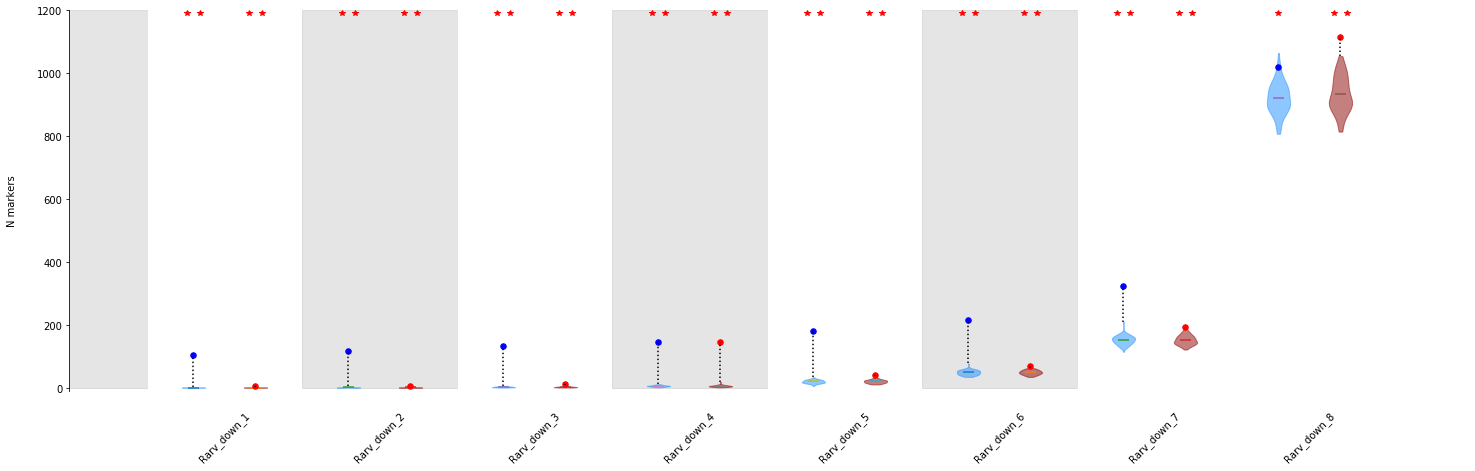

In [18]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 1200


#real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in sorted(whisky_data.keys()):
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-1, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos-0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, max_y-10, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos+0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, max_y-10, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, max_y)
ax.set_xticks(range(1,len(whisky_data.keys())+2))
ax.set_xticklabels(sorted(whisky_data.keys()), rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/SLM_Randomisations_het.svg")
    
plt.show()

# Permutations for the M F skewed subsampling

## Female biased (see name of popmap file for sample numbers)

In [12]:
Parameter_dictionaries = []

In [13]:
Parameter_dict_M19_F19 = {}
Parameter_dict_M19_F19["Name"] = "M19_F19"

##### Data ########################

Parameter_dict_M19_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M19_F19)

In [14]:
Parameter_dict_M17_F19 = {}
Parameter_dict_M17_F19["Name"] = "M17_F19"

##### Data ########################

Parameter_dict_M17_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M17_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M17_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M17_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M17_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M17_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M17_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M17_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M17_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M17_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M17_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M17_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M17_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M17_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M17_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M17_F19)

In [15]:
Parameter_dict_M15_F19 = {}
Parameter_dict_M15_F19["Name"] = "M15_F19"

##### Data ########################

Parameter_dict_M15_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M15_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M15_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M15_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M15_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M15_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M15_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M15_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M15_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M15_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M15_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M15_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M15_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M15_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M15_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M15_F19)

In [16]:
Parameter_dict_M13_F19 = {}
Parameter_dict_M13_F19["Name"] = "M13_F19"

##### Data ########################

Parameter_dict_M13_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M13_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M13_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M13_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M13_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M13_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M13_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M13_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M13_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M13_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M13_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M13_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M13_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M13_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M13_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M13_F19)

In [17]:
Parameter_dict_M11_F19 = {}
Parameter_dict_M11_F19["Name"] = "M11_F19"

##### Data ########################

Parameter_dict_M11_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M11_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M11_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M11_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M11_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M11_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M11_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M11_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M11_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M11_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M11_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M11_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M11_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M11_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M11_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M11_F19)

In [18]:
Parameter_dict_M9_F19 = {}
Parameter_dict_M9_F19["Name"] = "M9_F19"

##### Data ########################

Parameter_dict_M9_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M9_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M9_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M9_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M9_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M9_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M9_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M9_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M9_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M9_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M9_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M9_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M9_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M9_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M9_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M9_F19)

In [19]:
Parameter_dict_M7_F19 = {}
Parameter_dict_M7_F19["Name"] = "M7_F19"

##### Data ########################

Parameter_dict_M7_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M7_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M7_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M7_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M7_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M7_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M7_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M7_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M7_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M7_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M7_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M7_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M7_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M7_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M7_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M7_F19)

In [20]:
Parameter_dict_M5_F19 = {}
Parameter_dict_M5_F19["Name"] = "M5_F19"

##### Data ########################

Parameter_dict_M5_F19['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M5_F19['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M5_F19['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M5_F19/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M5_F19['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M5_F19['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M5_F19['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M5_F19['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M5_F19['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M5_F19['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M5_F19['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M5_F19['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M5_F19['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M5_F19['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M5_F19['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries.append(Parameter_dict_M5_F19)

Run the permutations

In [27]:
from joblib import Parallel, delayed
import multiprocessing
import os
import shutil
from random import shuffle

results_dict = {}

for dataset in Parameter_dictionaries:
    print "processing dataset in", dataset["VCF"]
    # 1. Make a new directory next in the VCF path. 
    Randomisation_dir = "%s/Randomisations" % dataset["VCF"].rpartition("/")[0]
    if not os.path.exists(Randomisation_dir):
        os.makedirs(Randomisation_dir)
    
    # 2. Copy sex info and VCF into that folder
    
    shutil.copyfile(dataset["Pop_map"], "%s/Sex_ID_info.txt" % Randomisation_dir)  ## sex info
    shutil.copyfile(dataset["VCF"], "%s/batch_1.vcf" % Randomisation_dir)  ## sex info
    
    orig_vcf = "%s/batch_1.vcf" % Randomisation_dir
    
    print "\nRandomisations happening in %s" % Randomisation_dir
    
    ## 3. Make the randomised sex info files

    orig_popmap_path = "%s/Sex_ID_info.txt" % Randomisation_dir
    orig_popmap = open(orig_popmap_path, 'r').readlines()

    sexes = []
    samples = []
    IDs = []
    randomisations = []

    for line in orig_popmap:
        sexes.append(line.strip().split()[1])
        samples.append(line.strip().split()[0])
        IDs.append(line.strip().split()[2])

    popmaps = []
    for i in range(100):
        popmap_path = "%s/rand_popmap_%s.txt" % (Randomisation_dir, i)
        popmaps.append(popmap_path)
        rand_popmap = open(popmap_path, 'w')
        shuffle(sexes)
        randomisations.append(sexes)
        
        for i in range(len(samples)):
            rand_popmap.write("%s\t%s\t%s\n" % (samples[i], sexes[i], IDs[i]))

        rand_popmap.close()
    
    print "\nRandom sex info files made"
    
    ## make new VCFs for parallelised analyses
    
    for i in popmaps:
        new_vcf = "%s.vcf" % i.rpartition(".")[0]
        shutil.copyfile(orig_vcf, new_vcf)
        
    ## 4. Run the randomisations
    
    print "\nRunning randomisations\n"
    
    results_dict[dataset["Name"]] = Parallel(n_jobs=4, verbose = 1)(delayed(Super_SLM_finder_parallel)(i, dataset) for i in popmaps)
    
    ## 5. Output the results for each species after the species is complete (i.e. checkpoints)
    
    outfile = open("%s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"]), 'w')
    
    for Randomisation in results_dict[dataset["Name"]]:

        XYfreq = len(Randomisation["Detailed"]["XY"]["freq"])
        XYhet = len(Randomisation["Detailed"]["XY"]["het"])
        Ytags = len(Randomisation["Detailed"]["XY"]["Ytags"])
    
        ZWfreq = len(Randomisation["Detailed"]["ZW"]["freq"])
        ZWhet = len(Randomisation["Detailed"]["ZW"]["het"])
        Wtags = len(Randomisation["Detailed"]["ZW"]["Wtags"])
                
        line = "%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (dataset["Name"],XYfreq,XYhet,Ytags,ZWfreq,ZWhet,Wtags)
    
        outfile.write(line)
        
    outfile.close()
    
    print "Results outputted to %s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"])
    
    
    

processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 4
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 0
Final number of ZW tags = 3
Final n

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 39.5min


Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 2
Final number of XY tags = 0
Final number of ZW tags = 3
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 4
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 4
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 2
Final number of ZW tags = 2
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 3
Final number of XY tags = 1
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW t

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 90.4min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M19_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 4
Final number of XY tags = 3
Final number of ZW tags = 3
Final number of XY tags = 2
Final number of ZW tags = 2
Final number of XY tags = 0
Final number of ZW tags = 3
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 39.1min


Final number of XY tags = 0
Final number of ZW tags = 7
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 0
Final number of XY tags = 4
Final number of ZW tags = 2
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 3
Final number of XY tags = 4
Final number of ZW tags = 3
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 0
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW t

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 89.0min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M17_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 3
Final number of ZW tags = 6
Final number of XY tags = 3
Final number of ZW tags = 2
Final number of XY tags = 3
Final number of ZW tags = 8
Final number of XY tags = 0
Final number of ZW tags = 5
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 3
Final number of ZW tags = 8
Final number of XY tags = 4
Final number of ZW tags = 5
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 1
Final number of 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 38.8min


Final number of XY tags = 1
Final number of ZW tags = 9
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 7
Final number of XY tags = 0
Final number of ZW tags = 4
Final number of XY tags = 2
Final number of ZW tags = 6
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 10
Final number of XY tags = 2
Final number of ZW tags = 6
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 6
Final number of ZW tags = 1
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 2
Final number of ZW tags = 5
Final number of XY tags = 3
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 4
Final number of ZW tags = 8
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 1
Final number of XY tags = 3
Final number of ZW 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 88.3min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M15_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 1
Final number of ZW tags = 14
Final number of XY tags = 6
Final number of ZW tags = 7
Final number of XY tags = 3
Final number of ZW tags = 6
Final number of XY tags = 3
Final number of ZW tags = 7
Final number of XY tags = 3
Final number of ZW tags = 15
Final number of XY tags = 5
Final number of ZW tags = 9
Final number of XY tags = 5
Final number of ZW tags = 12
Final number of XY tags = 8
Final number of ZW tags = 9
Final number of XY tags = 2
Final number of ZW tags = 6
Final number of XY tags = 4
Final number of ZW tags = 5
Final number of XY tags = 5
Final number 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 38.1min


Final number of XY tags = 4
Final number of ZW tags = 10
Final number of XY tags = 3
Final number of ZW tags = 8
Final number of XY tags = 4
Final number of ZW tags = 13
Final number of XY tags = 3
Final number of ZW tags = 6
Final number of XY tags = 3
Final number of ZW tags = 8
Final number of XY tags = 5
Final number of ZW tags = 13
Final number of XY tags = 1
Final number of ZW tags = 7
Final number of XY tags = 3
Final number of ZW tags = 23
Final number of XY tags = 2
Final number of ZW tags = 7
Final number of XY tags = 2
Final number of ZW tags = 9
Final number of XY tags = 5
Final number of ZW tags = 7
Final number of XY tags = 1
Final number of ZW tags = 9
Final number of XY tags = 3
Final number of ZW tags = 6
Final number of XY tags = 4
Final number of ZW tags = 10
Final number of XY tags = 1
Final number of ZW tags = 11
Final number of XY tags = 4
Final number of ZW tags = 6
Final number of XY tags = 3
Final number of ZW tags = 8
Final number of XY tags = 0
Final number o

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 86.2min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M13_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 11
Final number of ZW tags = 24
Final number of XY tags = 1
Final number of ZW tags = 31
Final number of XY tags = 0
Final number of ZW tags = 13
Final number of XY tags = 5
Final number of ZW tags = 27
Final number of XY tags = 7
Final number of ZW tags = 20
Final number of XY tags = 5
Final number of ZW tags = 29
Final number of XY tags = 14
Final number of ZW tags = 21
Final number of XY tags = 2
Final number of ZW tags = 26
Final number of XY tags = 7
Final number of ZW tags = 33
Final number of XY tags = 2
Final number of ZW tags = 12
Final number of XY tags = 8
Fina

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 37.6min


Final number of XY tags = 5
Final number of ZW tags = 25
Final number of XY tags = 9
Final number of ZW tags = 22
Final number of XY tags = 5
Final number of ZW tags = 16
Final number of XY tags = 6
Final number of ZW tags = 30
Final number of XY tags = 10
Final number of ZW tags = 22
Final number of XY tags = 10
Final number of ZW tags = 16
Final number of XY tags = 8
Final number of ZW tags = 8
Final number of XY tags = 5
Final number of ZW tags = 21
Final number of XY tags = 7
Final number of ZW tags = 25
Final number of XY tags = 6
Final number of ZW tags = 29
Final number of XY tags = 5
Final number of ZW tags = 11
Final number of XY tags = 6
Final number of ZW tags = 16
Final number of XY tags = 4
Final number of ZW tags = 38
Final number of XY tags = 6
Final number of ZW tags = 22
Final number of XY tags = 4
Final number of ZW tags = 26
Final number of XY tags = 8
Final number of ZW tags = 12
Final number of XY tags = 5
Final number of ZW tags = 25
Final number of XY tags = 2
Fi

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 85.4min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M11_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 13
Final number of ZW tags = 72
Final number of XY tags = 14
Final number of ZW tags = 71
Final number of XY tags = 12
Final number of ZW tags = 51
Final number of XY tags = 10
Final number of ZW tags = 92
Final number of XY tags = 12
Final number of ZW tags = 54
Final number of XY tags = 14
Final number of ZW tags = 66
Final number of XY tags = 8
Final number of ZW tags = 99
Final number of XY tags = 15
Final number of ZW tags = 62
Final number of XY tags = 19
Final number of ZW tags = 64
Final number of XY tags = 8
Final number of ZW tags = 58
Final number of XY tags = 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 37.4min


Final number of XY tags = 16
Final number of ZW tags = 57
Final number of XY tags = 9
Final number of ZW tags = 44
Final number of XY tags = 8
Final number of ZW tags = 76
Final number of XY tags = 8
Final number of ZW tags = 50
Final number of XY tags = 10
Final number of ZW tags = 38
Final number of XY tags = 12
Final number of ZW tags = 57
Final number of XY tags = 6
Final number of ZW tags = 67
Final number of XY tags = 8
Final number of ZW tags = 55
Final number of XY tags = 16
Final number of ZW tags = 58
Final number of XY tags = 17
Final number of ZW tags = 55
Final number of XY tags = 9
Final number of ZW tags = 72
Final number of XY tags = 8
Final number of ZW tags = 57
Final number of XY tags = 16
Final number of ZW tags = 49
Final number of XY tags = 9
Final number of ZW tags = 51
Final number of XY tags = 16
Final number of ZW tags = 55
Final number of XY tags = 8
Final number of ZW tags = 71
Final number of XY tags = 9
Final number of ZW tags = 48
Final number of XY tags 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 84.8min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M9_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 36
Final number of ZW tags = 155
Final number of XY tags = 32
Final number of ZW tags = 190
Final number of XY tags = 24
Final number of ZW tags = 184
Final number of XY tags = 34
Final number of ZW tags = 202
Final number of XY tags = 30
Final number of ZW tags = 122
Final number of XY tags = 24
Final number of ZW tags = 198
Final number of XY tags = 36
Final number of ZW tags = 147
Final number of XY tags = 38
Final number of ZW tags = 129
Final number of XY tags = 25
Final number of ZW tags = 168
Final number of XY tags = 22
Final number of ZW tags = 140
Final number of

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 37.0min


Final number of XY tags = 27
Final number of ZW tags = 135
Final number of XY tags = 32
Final number of ZW tags = 180
Final number of XY tags = 23
Final number of ZW tags = 197
Final number of XY tags = 37
Final number of ZW tags = 182
Final number of XY tags = 25
Final number of ZW tags = 120
Final number of XY tags = 37
Final number of ZW tags = 304
Final number of XY tags = 22
Final number of ZW tags = 155
Final number of XY tags = 31
Final number of ZW tags = 193
Final number of XY tags = 38
Final number of ZW tags = 110
Final number of XY tags = 32
Final number of ZW tags = 148
Final number of XY tags = 24
Final number of ZW tags = 132
Final number of XY tags = 28
Final number of ZW tags = 150
Final number of XY tags = 33
Final number of ZW tags = 165
Final number of XY tags = 37
Final number of ZW tags = 162
Final number of XY tags = 36
Final number of ZW tags = 178
Final number of XY tags = 28
Final number of ZW tags = 158
Final number of XY tags = 27
Final number of ZW tags = 1

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 84.5min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations__M7_F19.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 80
Final number of ZW tags = 426
Final number of XY tags = 99
Final number of ZW tags = 581
Final number of XY tags = 91
Final number of ZW tags = 515
Final number of XY tags = 111
Final number of ZW tags = 494
Final number of XY tags = 83
Final number of ZW tags = 486
Final number of XY tags = 103
Final number of ZW tags = 429
Final number of XY tags = 94
Final number of ZW tags = 491
Final number of XY tags = 113
Final number of ZW tags = 508
Final number of XY tags = 98
Final number of ZW tags = 524
Final number of XY tags = 95
Final number of ZW tags = 467
Final number

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 37.1min


Final number of XY tags = 86
Final number of ZW tags = 446
Final number of XY tags = 98
Final number of ZW tags = 464
Final number of XY tags = 95
Final number of ZW tags = 652
Final number of XY tags = 88
Final number of ZW tags = 456
Final number of XY tags = 98
Final number of ZW tags = 515
Final number of XY tags = 88
Final number of ZW tags = 414
Final number of XY tags = 102
Final number of ZW tags = 556
Final number of XY tags = 82
Final number of ZW tags = 596
Final number of XY tags = 91
Final number of ZW tags = 468
Final number of XY tags = 97
Final number of ZW tags = 539
Final number of XY tags = 95
Final number of ZW tags = 610
Final number of XY tags = 114
Final number of ZW tags = 574
Final number of XY tags = 84
Final number of ZW tags = 707
Final number of XY tags = 96
Final number of ZW tags = 450
Final number of XY tags = 111
Final number of ZW tags = 436
Final number of XY tags = 97
Final number of ZW tags = 459
Final number of XY tags = 94
Final number of ZW tags 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 83.9min finished


In [28]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/"):
    for fil in files:
        if fil.startswith("Randomisations") and "pdf" not in fil:
            rando_paths.append("%s/%s" % (root, fil))
for i in rando_paths:
    print i

/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M13_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M5_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M11_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M17_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M9_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M7_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M19_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M15_F19.txt


In [31]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))

    



In [33]:
real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Real_data_female_biased.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


In [40]:
whiskey_list = ["_M5_F19",
                "_M7_F19",
                "_M9_F19",
                "_M11_F19",
                "_M13_F19",
                "_M15_F19",
                "_M17_F19",
                "_M19_F19"]

_M19_F19
_M17_F19
_M15_F19
_M13_F19
_M11_F19
_M9_F19
_M7_F19
_M5_F19


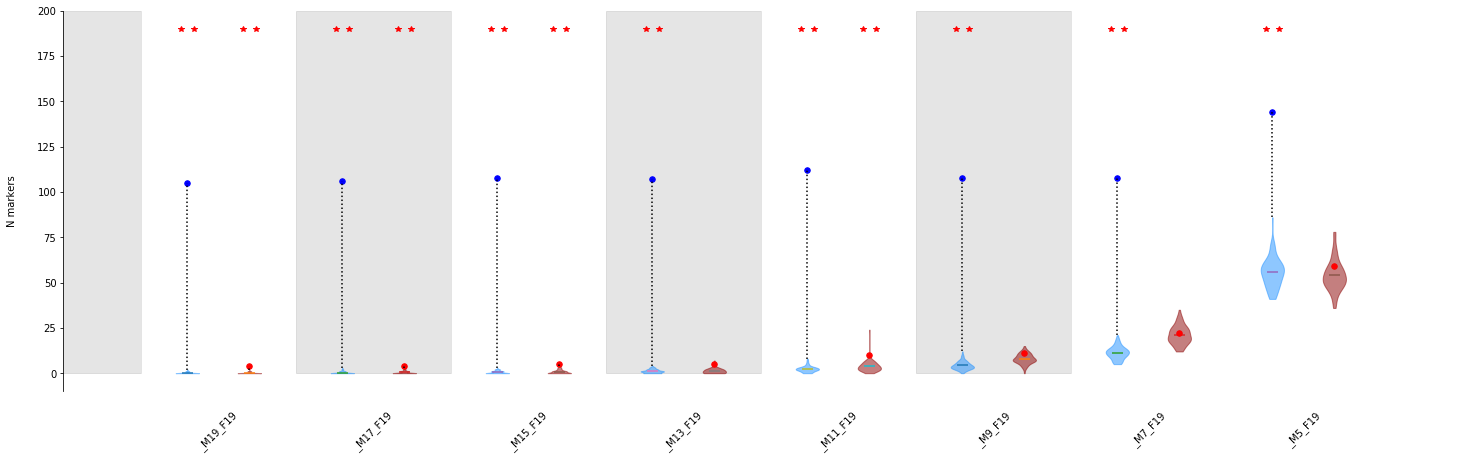

In [68]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 200


#real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in whiskey_list:
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-1, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos-0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, max_y-10, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos+0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, max_y-10, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, max_y)
ax.set_xticks(range(1,len(whiskey_list)+2))
ax.set_xticklabels(whiskey_list, rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/SLM_Randomisations_het.svg")
    
plt.show()

## Male biased subsamples

In [122]:
Parameter_dictionaries_male_biased = []

In [123]:
Parameter_dict_M19_F17 = {}
Parameter_dict_M19_F17["Name"] = "M19_F17"

##### Data ########################

Parameter_dict_M19_F17['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F17['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F17['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F17/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F17['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F17['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F17['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F17['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F17['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F17['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F17['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F17['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F17['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F17['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F17['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F17)

In [55]:
Parameter_dict_M19_F15 = {}
Parameter_dict_M19_F15["Name"] = "M19_F15"

##### Data ########################

Parameter_dict_M19_F15['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F15['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F15['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F15/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F15['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F15['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F15['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F15['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F15['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F15['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F15['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F15['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F15['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F15['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F15['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F15)

In [124]:
Parameter_dict_M19_F13 = {}
Parameter_dict_M19_F13["Name"] = "M19_F13"

##### Data ########################

Parameter_dict_M19_F13['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F13['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F13['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F13/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F13['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F13['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F13['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F13['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F13['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F13['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F13['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F13['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F13['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F13['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F13['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F13)

In [57]:
Parameter_dict_M19_F11 = {}
Parameter_dict_M19_F11["Name"] = "M19_F11"

##### Data ########################

Parameter_dict_M19_F11['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F11['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F11['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F11/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F11['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F11['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F11['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F11['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F11['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F11['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F11['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F11['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F11['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F11['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F11['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F11)

In [58]:
Parameter_dict_M19_F9 = {}
Parameter_dict_M19_F9["Name"] = "M19_F9"

##### Data ########################

Parameter_dict_M19_F9['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F9['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F9['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F9/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F9['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F9['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F9['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F9['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F9['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F9['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F9['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F9['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F9['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F9['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F9['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F9)

In [59]:
Parameter_dict_M19_F7 = {}
Parameter_dict_M19_F7["Name"] = "M19_F7"

##### Data ########################

Parameter_dict_M19_F7['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F7['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F7['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F7/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F7['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F7['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F7['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F7['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F7['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F7['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F7['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F7['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F7['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F7['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F7['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F7)

In [60]:
Parameter_dict_M19_F5 = {}
Parameter_dict_M19_F5["Name"] = "M19_F5"

##### Data ########################

Parameter_dict_M19_F5['Catalog'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_M19_F5['VCF'] =  "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_M19_F5['Pop_map'] = "/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_skew_M19_F5/Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_M19_F5['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_M19_F5['sample_presence_cutoff1'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F5['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F5['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_M19_F5['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_M19_F5['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_M19_F5['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_M19_F5['sample_presence_cutoff2'] = 0.1 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_M19_F5['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_M19_F5['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_M19_F5['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.

Parameter_dictionaries_male_biased.append(Parameter_dict_M19_F5)

## Run the permutations

In [126]:
from joblib import Parallel, delayed
import multiprocessing
import os
import shutil
from random import shuffle

results_dict = {}

for dataset in Parameter_dictionaries_male_biased:
    print "processing dataset in", dataset["VCF"]
    # 1. Make a new directory next in the VCF path. 
    Randomisation_dir = "%s/Randomisations" % dataset["VCF"].rpartition("/")[0]
    if not os.path.exists(Randomisation_dir):
        os.makedirs(Randomisation_dir)
    
    # 2. Copy sex info and VCF into that folder
    
    shutil.copyfile(dataset["Pop_map"], "%s/Sex_ID_info.txt" % Randomisation_dir)  ## sex info
    shutil.copyfile(dataset["VCF"], "%s/batch_1.vcf" % Randomisation_dir)  ## sex info
    
    orig_vcf = "%s/batch_1.vcf" % Randomisation_dir
    
    print "\nRandomisations happening in %s" % Randomisation_dir
    
    ## 3. Make the randomised sex info files

    orig_popmap_path = "%s/Sex_ID_info.txt" % Randomisation_dir
    orig_popmap = open(orig_popmap_path, 'r').readlines()

    sexes = []
    samples = []
    IDs = []
    randomisations = []

    for line in orig_popmap:
        sexes.append(line.strip().split()[1])
        samples.append(line.strip().split()[0])
        IDs.append(line.strip().split()[2])

    popmaps = []
    for i in range(100):
        popmap_path = "%s/rand_popmap_%s.txt" % (Randomisation_dir, i)
        popmaps.append(popmap_path)
        rand_popmap = open(popmap_path, 'w')
        shuffle(sexes)
        randomisations.append(sexes)
        
        for i in range(len(samples)):
            rand_popmap.write("%s\t%s\t%s\n" % (samples[i], sexes[i], IDs[i]))

        rand_popmap.close()
    
    print "\nRandom sex info files made"
    
    ## make new VCFs for parallelised analyses
    
    for i in popmaps:
        new_vcf = "%s.vcf" % i.rpartition(".")[0]
        shutil.copyfile(orig_vcf, new_vcf)
        
    ## 4. Run the randomisations
    
    print "\nRunning randomisations\n"
    
    results_dict[dataset["Name"]] = Parallel(n_jobs=4, verbose = 1)(delayed(Super_SLM_finder_parallel)(i, dataset) for i in popmaps)
    
    ## 5. Output the results for each species after the species is complete (i.e. checkpoints)
    
    outfile = open("%s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"]), 'w')
    
    for Randomisation in results_dict[dataset["Name"]]:

        XYfreq = len(Randomisation["Detailed"]["XY"]["freq"])
        XYhet = len(Randomisation["Detailed"]["XY"]["het"])
        Ytags = len(Randomisation["Detailed"]["XY"]["Ytags"])
    
        ZWfreq = len(Randomisation["Detailed"]["ZW"]["freq"])
        ZWhet = len(Randomisation["Detailed"]["ZW"]["het"])
        Wtags = len(Randomisation["Detailed"]["ZW"]["Wtags"])
                
        line = "%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (dataset["Name"],XYfreq,XYhet,Ytags,ZWfreq,ZWhet,Wtags)
    
        outfile.write(line)
        
    outfile.close()
    
    print "Results outputted to %s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"])
    
    
    

processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 1
Final number of ZW tags = 4
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 3
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 6
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 2
Final number of ZW tags = 1
Final n

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 38.8min


Final number of XY tags = 1
Final number of ZW tags = 4
Final number of XY tags = 1
Final number of ZW tags = 3
Final number of XY tags = 3
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 3
Final number of ZW tags = 2
Final number of XY tags = 1
Final number of ZW tags = 0
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 0
Final number of ZW tags = 2
Final number of XY tags = 0
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 0
Final number of XY tags = 5
Final number of ZW tags = 0
Final number of XY tags = 4
Final number of ZW tags = 0
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 3
Final number of ZW tags = 1
Final number of XY tags = 1
Final number of ZW tags = 1
Final number of XY tags = 5
Final number of ZW t

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 89.4min finished


Results outputted to /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/Randomisations_M19_F17.txt
processing dataset in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/batch_1.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 7
Final number of ZW tags = 4
Final number of XY tags = 12
Final number of ZW tags = 4
Final number of XY tags = 11
Final number of ZW tags = 4
Final number of XY tags = 8
Final number of ZW tags = 2
Final number of XY tags = 10
Final number of ZW tags = 4
Final number of XY tags = 7
Final number of ZW tags = 9
Final number of XY tags = 8
Final number of ZW tags = 4
Final number of XY tags = 14
Final number of ZW tags = 4
Final number of XY tags = 9
Final number of ZW tags = 2
Final number of XY tags = 12
Final number of ZW tags = 1
Final number of XY tags = 11
Final numbe

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 39.8min


Final number of XY tags = 4
Final number of ZW tags = 2
Final number of XY tags = 12
Final number of ZW tags = 2
Final number of XY tags = 14
Final number of ZW tags = 3
Final number of XY tags = 9
Final number of ZW tags = 4
Final number of XY tags = 10
Final number of ZW tags = 3
Final number of XY tags = 14
Final number of ZW tags = 0
Final number of XY tags = 5
Final number of ZW tags = 8
Final number of XY tags = 10
Final number of ZW tags = 4
Final number of XY tags = 19
Final number of ZW tags = 2
Final number of XY tags = 13
Final number of ZW tags = 1
Final number of XY tags = 5
Final number of ZW tags = 5
Final number of XY tags = 4
Final number of ZW tags = 1
Final number of XY tags = 5
Final number of ZW tags = 3
Final number of XY tags = 6
Final number of ZW tags = 6
Final number of XY tags = 6
Final number of ZW tags = 3
Final number of XY tags = 16
Final number of ZW tags = 1
Final number of XY tags = 23
Final number of ZW tags = 3
Final number of XY tags = 8
Final numbe

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 93.6min finished


In [127]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations/"):
    for fil in files:
        if fil.startswith("Randomisations") and "M19" in fil:
            rando_paths.append("%s/%s" % (root, fil))
for i in rando_paths:
    print i

/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F11.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F17.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F7.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F15.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F9.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F5.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations__M19_F19.txt
/home/djeffrie/Data/RADseq/Rarvalis_NEW/Populations_Y_haplogroup_1/Randomisations//Randomisations_M19_F13.txt


In [128]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]
        
        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))

    



In [129]:
whisky_data.keys()

['_M19_F19',
 'M19_F11',
 'M19_F13',
 'M19_F15',
 'M19_F17',
 'M19_F7',
 'M19_F5',
 'M19_F9']

In [130]:
real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Real_data_male_biased.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


In [131]:
whiskey_list = ["_M19_F19",
                "M19_F17",
                "M19_F15",
                "M19_F13",
                "M19_F11",
                "M19_F9",
                "M19_F7",
                "M19_F5"]

_M19_F19
M19_F17
M19_F15
M19_F13
M19_F11
M19_F9
M19_F7
M19_F5


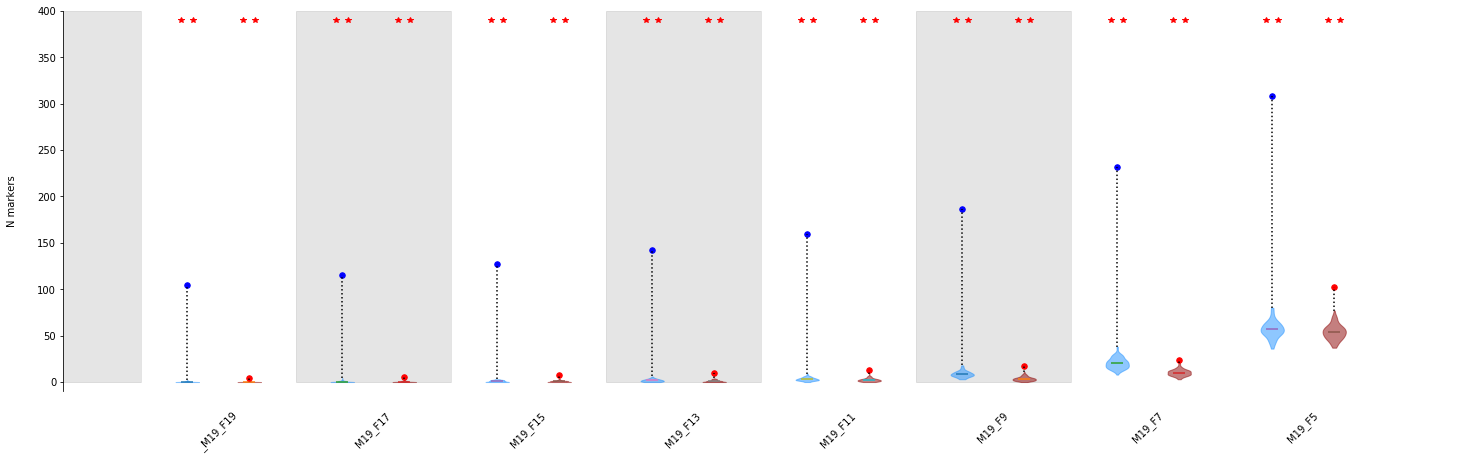

In [135]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 400


#real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in whiskey_list:
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-1, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos-0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, max_y-10, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos+0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, max_y-10, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, max_y)
ax.set_xticks(range(1,len(whiskey_list)+2))
ax.set_xticklabels(whiskey_list, rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/SLM_Randomisations_het_male_biased.svg")
    
plt.show()